# Import Libraries

In [1]:
import yt
import unyt
import caesar

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.legend import Legend
# from matplotlib.patches import Rectangle

import pprint
import os
import copy
import gc
import dill
import h5py

In [2]:
gc.isenabled()

True

# Dictionary of simulation runs

In [29]:
sim_dict = {    
    r'Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Fiducial, $M_{\mathrm{BH,seed}}=10^4\,[\mathrm{M_{\odot}}]$':{
        'halo_file':'/scratch/aspadawe/snapshots/HyenasC/L0/SimbaC_L0_Calibration/halo_3224_good-trillium/caesar_snap/snap_props/v1/halo_0_props-v1.hdf5',
        'sim':'Simba-C',
    },

    # r'Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Corrected':{
    #     'halo_file':'/scratch/aspadawe/snapshots/HyenasC/L0/SimbaC_L0_Calibration/halo_3224_good-correct_jet/caesar_snap/snap_props/v1/halo_0_props-v1.hdf5',
    #     'sim':'Simba-C',
    # },

    r'Hyenas-C L0 (Simba-C L1 Calibration) Halo 3224 - Fiducial, $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}}$':{
        'halo_file':'/scratch/aspadawe/snapshots/HyenasC/L0/SimbaC_L1_Calibration/halo_3224_og_good/caesar_snap/snap_props/v1/halo_0_props-v1.hdf5',
        'sim':'Simba-C',
    },
    

    r'Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Fiducial, $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}}$':{
        'halo_file':'/scratch/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_good-trillium/caesar_snap/snap_props/v1/halo_0_props-v1.hdf5',
        'sim':'Simba-C',
    },

    # r'Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Corrected':{
    #     'halo_file':'/scratch/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_good-correct_jet/caesar_snap/snap_props/v1/halo_0_props-v1.hdf5',
    #     'sim':'Simba-C',
    # },

    r'Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Fiducial, $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}}$':{
        'halo_file':'/scratch/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224-BHSeedMass_1e-7/caesar_snap/snap_props/v1/halo_0_props-v1.hdf5',
        'sim':'Simba-C',
    },


    
    r'Hyenas L0 (Simba L0 Calibration) Halo 3224 - $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}}$':{
        'halo_file':'/scratch/aspadawe/snapshots/Hyenas/L0/Simba_L0_Calibration/halo_3224_weiguang/Groups/snap_props/v1/halo_3_props-v1.hdf5',
        'sim':'Simba',
    },

    r'Hyenas L1 (Simba L0 Calibration) Halo 3224 - $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}}$':{
        'halo_file':'/scratch/aspadawe/snapshots/Hyenas/L1/Simba_L0_Calibration/halo_3224_weiguang/Groups/snap_props/v1/halo_3_props-v1.hdf5',
        'sim':'Simba',
    },
}

In [30]:
for sim, sim_info in sim_dict.items():
    print(sim)

    # with open(sim_info['halo_file'], 'rb') as f:
    #     sim_info['halo_props'] = dill.load(f)
    #     pprint.pprint(sim_info['halo_props']['halo']['snap_num'])

    f = h5py.File(sim_info['halo_file'], 'r')
    sim_info['halo_props'] = f
    print(list(sim_info['halo_props'].keys()))
    # print(f['/halo/snap_num'][:])
    # print(f['halo']['snap_num'][:])
    # print(f['halo']['num_major_mergers_cm'][:])
    # print(f['halo']['ssfr_100'][:])
    # print(f['central']['snap_num'][:])
    # print(f['central']['mass_weighted_temperature'][:])
    

    # with h5py.File(sim_info['halo_file'], 'r') as f:
    #     sim_info['halo_props'] = f
    #     print(list(sim_info['halo_props'].keys()))
    #     # print(f['/halo/snap_num'][:])
    #     print(f['halo']['snap_num'][:])
    #     print(f['halo']['num_major_mergers_cm'][:])
    #     # print(f['halo']['ssfr_100'][:])
    #     print(f['central']['snap_num'][:])
    #     print(f['central']['mass_weighted_temperature'][:])
    #     # print(f['central']['ssfr_100'][:])

    print()

Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Fiducial, $M_{\mathrm{BH,seed}}=10^4\,[\mathrm{M_{\odot}}]$
['central', 'halo']

Hyenas-C L0 (Simba-C L1 Calibration) Halo 3224 - Fiducial, $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}}$
['central', 'halo']

Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Fiducial, $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}}$
['central', 'halo']

Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Fiducial, $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}}$
['central', 'halo']

Hyenas L0 (Simba L0 Calibration) Halo 3224 - $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}}$
['central', 'halo']

Hyenas L1 (Simba L0 Calibration) Halo 3224 - $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}}$
['central', 'halo']



# Plot

## Properties available

In [31]:
log_props = ['m2500c', 'm500c', 'm200c',
             'r2500c', 'r500c', 'r200c',
             'r2500c_cm', 'r500c_cm', 'r200c_cm',
             'bh_mdot', 'bh_fedd', 'bh_mdot_edd',
             'sfr', 'sfr_100', 'ssfr', 'ssfr_100',
             'temperature', 'mass_weighted_temperature', 'mass_weighted_cgm_temperature',
             'gas_mass', 'stellar_mass', 'dm_mass', 'bh_mass', 'dust_mass', 'HI_mass', 'H2_mass',
             'gas_30kpc_mass', 'stellar_30kpc_mass', 'dm_30kpc_mass', 'bh_30kpc_mass', 'dust_30kpc_mass', 'HI_30kpc_mass', 'H2_30kpc_mass',
             'gas_half_mass_radius', 'stellar_half_mass_radius', 'dm_half_mass_radius', 'bh_half_mass_radius', 'baryon_half_mass_radius', 'total_half_mass_radius', 
             'gas_r20_radius', 'stellar_r20_radius', 'dm_r20_radius', 'bh_r20_radius', 'baryon_r20_radius', 'total_r20_radius', 
             'gas_r80_radius', 'stellar_r80_radius', 'dm_r80_radius', 'bh_r80_radius', 'baryon_r80_radius', 'total_r80_radius',
             'gas_half_mass_radius_cm', 'stellar_half_mass_radius_cm', 'dm_half_mass_radius_cm', 'bh_half_mass_radius_cm', 'baryon_half_mass_radius_cm', 'total_half_mass_radius_cm', 
             'gas_r20_radius_cm', 'stellar_r20_radius_cm', 'dm_r20_radius_cm', 'bh_r20_radius_cm', 'baryon_r20_radius_cm', 'total_r20_radius_cm', 
             'gas_r80_radius_cm', 'stellar_r80_radius_cm', 'dm_r80_radius_cm', 'bh_r80_radius_cm', 'baryon_r80_radius_cm', 'total_r80_radius_cm',
             'mass_weighted_metallicity', 'sfr_weighted_metallicity', 'stellar_metallicity', 'mass_weighted_cgm_metallicity', 'temp_weighted_cgm_metallicity',
             'mass_weighted_stellar_age', 'metal_weighted_stellar_age',
             'local_mass_density_300kpccm', 'local_mass_density_1000kpccm', 'local_mass_density_3000kpccm', 
             'local_number_density_300kpccm', 'local_number_density_1000kpccm', 'local_number_density_3000kpccm', 
             'baryon_L_rotation', 'gas_L_rotation', 'stellar_L_rotation', 'dm_L_rotation', 'total_L_rotation',
             'H2_mass', 'H2_ism_mass', 'HI_mass', 'HI_ism_mass', 'baryon_mass', 'bh_mass', 'dm_mass', 'dm2_mass', 'dust_mass', 'gas_mass', 'stellar_mass', 'total_mass'
             'H2_mass', 'H2_30kpc_mass', 'H2_ism_mass', 'HI_mass', 'HI_30kpc_mass', 'HI_ism_mass', 'baryon_mass', 'bh_mass', 'bh_30kpc_mass', 'bh_stellar_half_mass_radius_mass', 'dm2_30kpc', 'dm2_stellar_half_mass_radius_mass', 'dm_30kpc_mass', 'dm_stellar_half_mass_radius_mass', 'dust_mass', 'gas_mass', 'gas_30kpc_mass', 'gas_stellar_half_mass_radius_mass', 'star_30kpc_mass', 'star_stellar_half_mass_radius_mass', 'stellar_mass', 'total_mass',
             'ngas', 'ndm', 'nstar', 'nbh',
             'nPartType0_30ckpc', 'nPartType0_50ckpc', 'nPartType1_30ckpc', 'nPartType1_50ckpc', 'nPartType2_30ckpc', 'nPartType2_50ckpc', 'nPartType4_30ckpc', 'nPartType4_50ckpc', 'nPartType5_30ckpc', 'nPartType5_50ckpc',
             'bh_Lbol', 'bh_Lbol_30ckpc', 'bh_Lbol_3ckpc', 'bh_Lbol_50ckpc',
             'bh_Lbol_acc', 'bh_Lbol_acc_30ckpc', 'bh_Lbol_acc_3ckpc', 'bh_Lbol_acc_50ckpc',
             'bh_mdot_acc',
             'mPartType0_30ckpc',
 'mPartType0_3ckpc',
 'mPartType0_50ckpc',
 'mPartType0_Aviv_sub_virial_dave+2019_30ckpc',
 'mPartType0_Aviv_sub_virial_dave+2019_3ckpc',
 'mPartType0_Aviv_sub_virial_dave+2019_50ckpc',
 'mPartType0_Aviv_super_virial_dave+2019_30ckpc',
 'mPartType0_Aviv_super_virial_dave+2019_3ckpc',
 'mPartType0_Aviv_super_virial_dave+2019_50ckpc',
 'mPartType0_Sokolowska+2018_cold_30ckpc',
 'mPartType0_Sokolowska+2018_cold_3ckpc',
 'mPartType0_Sokolowska+2018_cold_50ckpc',
 'mPartType0_Sokolowska+2018_hot_30ckpc',
 'mPartType0_Sokolowska+2018_hot_3ckpc',
 'mPartType0_Sokolowska+2018_hot_50ckpc',
 'mPartType0_Sokolowska+2018_warm_30ckpc',
 'mPartType0_Sokolowska+2018_warm_3ckpc',
 'mPartType0_Sokolowska+2018_warm_50ckpc',
 'mPartType0_Sokolowska+2018_warm_hot_30ckpc',
 'mPartType0_Sokolowska+2018_warm_hot_3ckpc',
 'mPartType0_Sokolowska+2018_warm_hot_50ckpc',
 'mPartType0_van_de_Voort_2019_ICM_30ckpc',
 'mPartType0_van_de_Voort_2019_ICM_3ckpc',
 'mPartType0_van_de_Voort_2019_ICM_50ckpc',
 'mPartType0_van_de_Voort_2019_WHIM_30ckpc',
 'mPartType0_van_de_Voort_2019_WHIM_3ckpc',
 'mPartType0_van_de_Voort_2019_WHIM_50ckpc',
 'mPartType0_van_de_Voort_2019_cold_halo_gas_30ckpc',
 'mPartType0_van_de_Voort_2019_cold_halo_gas_3ckpc',
 'mPartType0_van_de_Voort_2019_cold_halo_gas_50ckpc',
 'mPartType0_van_de_Voort_2019_diffuse_IGM_30ckpc',
 'mPartType0_van_de_Voort_2019_diffuse_IGM_3ckpc',
 'mPartType0_van_de_Voort_2019_diffuse_IGM_50ckpc',
 'mPartType0_van_de_Voort_2019_star_forming_ISM_30ckpc',
 'mPartType0_van_de_Voort_2019_star_forming_ISM_3ckpc',
 'mPartType0_van_de_Voort_2019_star_forming_ISM_50ckpc',
 'mPartType1_30ckpc',
 'mPartType1_3ckpc',
 'mPartType1_50ckpc',
 'mPartType2_30ckpc',
 'mPartType2_3ckpc',
 'mPartType2_50ckpc',
 'mPartType4_30ckpc',
 'mPartType4_3ckpc',
 'mPartType4_50ckpc',
 'mPartType5_30ckpc',
 'mPartType5_3ckpc',
 'mPartType5_50ckpc',
 'mPartType5_phys_30ckpc',
 'mPartType5_phys_3ckpc',
 'mPartType5_phys_50ckpc',
             'nPartType0_30ckpc',
 'nPartType0_3ckpc',
 'nPartType0_50ckpc',
 'nPartType1_30ckpc',
 'nPartType1_3ckpc',
 'nPartType1_50ckpc',
 'nPartType2_30ckpc',
 'nPartType2_3ckpc',
 'nPartType2_50ckpc',
 'nPartType4_30ckpc',
 'nPartType4_3ckpc',
 'nPartType4_50ckpc',
 'nPartType5_30ckpc',
 'nPartType5_3ckpc',
 'nPartType5_50ckpc',
 'nPartType5_jets_30ckpc',
 'nPartType5_jets_3ckpc',
 'nPartType5_jets_50ckpc',
 'nPartType5_no_accretion_30ckpc',
 'nPartType5_no_accretion_3ckpc',
 'nPartType5_no_accretion_50ckpc',
 'nPartType5_quasar_30ckpc',
 'nPartType5_quasar_3ckpc',
 'nPartType5_quasar_50ckpc',
             'Tvir_dave+2019',
 'Tvir_van_ve_Voort_2019',
 'Tvir_van_ve_Voort_2019_v2',
 'bh_Lbol_acc_r200c',
 'bh_Lbol_acc_r2500c',
 'bh_Lbol_acc_r500c',
 'bh_Lbol_r200c',
 'bh_Lbol_r2500c',
 'bh_Lbol_r500c',
             'mPartType0_Aviv_sub_virial_dave+2019_r200c',
 'mPartType0_Aviv_sub_virial_dave+2019_r2500c',
 'mPartType0_Aviv_sub_virial_dave+2019_r500c',
 'mPartType0_Aviv_super_virial_dave+2019_r200c',
 'mPartType0_Aviv_super_virial_dave+2019_r2500c',
 'mPartType0_Aviv_super_virial_dave+2019_r500c',
 'mPartType0_Sokolowska+2018_cold_r200c',
 'mPartType0_Sokolowska+2018_cold_r2500c',
 'mPartType0_Sokolowska+2018_cold_r500c',
 'mPartType0_Sokolowska+2018_hot_r200c',
 'mPartType0_Sokolowska+2018_hot_r2500c',
 'mPartType0_Sokolowska+2018_hot_r500c',
 'mPartType0_Sokolowska+2018_warm_hot_r200c',
 'mPartType0_Sokolowska+2018_warm_hot_r2500c',
 'mPartType0_Sokolowska+2018_warm_hot_r500c',
 'mPartType0_Sokolowska+2018_warm_r200c',
 'mPartType0_Sokolowska+2018_warm_r2500c',
 'mPartType0_Sokolowska+2018_warm_r500c',
 'mPartType0_r200c',
 'mPartType0_r2500c',
 'mPartType0_r500c',
 'mPartType0_van_de_Voort_2019_ICM_r200c',
 'mPartType0_van_de_Voort_2019_ICM_r2500c',
 'mPartType0_van_de_Voort_2019_ICM_r500c',
 'mPartType0_van_de_Voort_2019_WHIM_r200c',
 'mPartType0_van_de_Voort_2019_WHIM_r2500c',
 'mPartType0_van_de_Voort_2019_WHIM_r500c',
 'mPartType0_van_de_Voort_2019_cold_halo_gas_r200c',
 'mPartType0_van_de_Voort_2019_cold_halo_gas_r2500c',
 'mPartType0_van_de_Voort_2019_cold_halo_gas_r500c',
 'mPartType0_van_de_Voort_2019_diffuse_IGM_r200c',
 'mPartType0_van_de_Voort_2019_diffuse_IGM_r2500c',
 'mPartType0_van_de_Voort_2019_diffuse_IGM_r500c',
 'mPartType0_van_de_Voort_2019_star_forming_ISM_r200c',
 'mPartType0_van_de_Voort_2019_star_forming_ISM_r2500c',
 'mPartType0_van_de_Voort_2019_star_forming_ISM_r500c',
 'mPartType1_r200c',
 'mPartType1_r2500c',
 'mPartType1_r500c',
 'mPartType2_r200c',
 'mPartType2_r2500c',
 'mPartType2_r500c',
 'mPartType4_r200c',
 'mPartType4_r2500c',
 'mPartType4_r500c',
 'mPartType5_phys_r200c',
 'mPartType5_phys_r2500c',
 'mPartType5_phys_r500c',
 'mPartType5_r200c',
 'mPartType5_r2500c',
 'mPartType5_r500c',
             'nPartType0_r200c',
 'nPartType0_r2500c',
 'nPartType0_r500c',
 'nPartType1_r200c',
 'nPartType1_r2500c',
 'nPartType1_r500c',
 'nPartType2_r200c',
 'nPartType2_r2500c',
 'nPartType2_r500c',
 'nPartType4_r200c',
 'nPartType4_r2500c',
 'nPartType4_r500c',
 'nPartType5_jets_r200c',
 'nPartType5_jets_r2500c',
 'nPartType5_jets_r500c',
 'nPartType5_no_accretion_r200c',
 'nPartType5_no_accretion_r2500c',
 'nPartType5_no_accretion_r500c',
 'nPartType5_quasar_r200c',
 'nPartType5_quasar_r2500c',
 'nPartType5_quasar_r500c',
 'nPartType5_r200c',
 'nPartType5_r2500c',
 'nPartType5_r500c',
            ]

In [32]:
props = []
for sim, sim_info in sim_dict.items():
    print(sim, sim_info)
    for obj_type in list(sim_info['halo_props'].keys()):
        for prop in list(sim_info['halo_props'][obj_type].keys()):
            if prop not in props:
                props.append(prop)

Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Fiducial, $M_{\mathrm{BH,seed}}=10^4\,[\mathrm{M_{\odot}}]$ {'halo_file': '/scratch/aspadawe/snapshots/HyenasC/L0/SimbaC_L0_Calibration/halo_3224_good-trillium/caesar_snap/snap_props/v1/halo_0_props-v1.hdf5', 'sim': 'Simba-C', 'halo_props': <HDF5 file "halo_0_props-v1.hdf5" (mode r)>}
Hyenas-C L0 (Simba-C L1 Calibration) Halo 3224 - Fiducial, $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}}$ {'halo_file': '/scratch/aspadawe/snapshots/HyenasC/L0/SimbaC_L1_Calibration/halo_3224_og_good/caesar_snap/snap_props/v1/halo_0_props-v1.hdf5', 'sim': 'Simba-C', 'halo_props': <HDF5 file "halo_0_props-v1.hdf5" (mode r)>}
Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Fiducial, $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}}$ {'halo_file': '/scratch/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_good-trillium/caesar_snap/snap_props/v1/halo_0_props-v1.hdf5', 'sim': 'Simba-C', 'halo_props': <HDF5 file "halo_0_props-v1.hdf5" (mode r)>}
Hyena

## Props

In [33]:
props

['H2_30kpc_mass',
 'H2_ism_mass',
 'H2_mass',
 'HI_30kpc_mass',
 'HI_ism_mass',
 'HI_mass',
 'PartType0_NNewWindLaunches_30ckpc',
 'PartType0_NNewWindLaunches_3ckpc',
 'PartType0_NNewWindLaunches_50ckpc',
 'PartType0_NWindLaunches_30ckpc',
 'PartType0_NWindLaunches_3ckpc',
 'PartType0_NWindLaunches_50ckpc',
 'PartType0_NWindLaunches_nowind_30ckpc',
 'PartType0_NWindLaunches_nowind_3ckpc',
 'PartType0_NWindLaunches_nowind_50ckpc',
 'PartType0_NWindLaunches_nowind_r50star',
 'PartType0_NWindLaunches_nowind_r80tot',
 'PartType0_NWindLaunches_onlywind_30ckpc',
 'PartType0_NWindLaunches_onlywind_3ckpc',
 'PartType0_NWindLaunches_onlywind_50ckpc',
 'PartType0_NWindLaunches_onlywind_r50star',
 'PartType0_NWindLaunches_onlywind_r80tot',
 'PartType0_NWindLaunches_r50star',
 'PartType0_NWindLaunches_r80tot',
 'a',
 'age',
 'baryon_half_mass_radius',
 'baryon_half_mass_radius_cm',
 'baryon_mass',
 'baryon_r20_radius',
 'baryon_r20_radius_cm',
 'baryon_r80_radius',
 'baryon_r80_radius_cm',
 'baryo

In [34]:
[print(x) for x in props] 

H2_30kpc_mass
H2_ism_mass
H2_mass
HI_30kpc_mass
HI_ism_mass
HI_mass
PartType0_NNewWindLaunches_30ckpc
PartType0_NNewWindLaunches_3ckpc
PartType0_NNewWindLaunches_50ckpc
PartType0_NWindLaunches_30ckpc
PartType0_NWindLaunches_3ckpc
PartType0_NWindLaunches_50ckpc
PartType0_NWindLaunches_nowind_30ckpc
PartType0_NWindLaunches_nowind_3ckpc
PartType0_NWindLaunches_nowind_50ckpc
PartType0_NWindLaunches_nowind_r50star
PartType0_NWindLaunches_nowind_r80tot
PartType0_NWindLaunches_onlywind_30ckpc
PartType0_NWindLaunches_onlywind_3ckpc
PartType0_NWindLaunches_onlywind_50ckpc
PartType0_NWindLaunches_onlywind_r50star
PartType0_NWindLaunches_onlywind_r80tot
PartType0_NWindLaunches_r50star
PartType0_NWindLaunches_r80tot
a
age
baryon_half_mass_radius
baryon_half_mass_radius_cm
baryon_mass
baryon_r20_radius
baryon_r20_radius_cm
baryon_r80_radius
baryon_r80_radius_cm
baryon_velocity_dispersion
baryon_velocity_dispersion_cm
bh_30kpc_mass
bh_LB_0.44um_Hopkins2007-Lbol
bh_LB_0.44um_Hopkins2007-Lbol_acc
bh_L

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
props[-400:]

In [ ]:
aa = np.array([1,2,3,4])
bb = np.roll(copy.deepcopy(aa), 1)
bb[0] = 0
print(aa)
print(bb)
print(aa - bb)

## Plot all properties over time

In [ ]:
sim_markers = ['o', '+', '^', 'x']
# sim_markers = ['o', 'o', '+', '^', 'x']
# sim_markers = ['+', '^', 'x']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['first_mmp_halo']#, 'second_mmp_halo']
# obj_types = ['first_mmp_halo']#, 'first_mmp_central_halo']
# obj_types = ['first_mmp_halo', 'first_mmp_halo_central']
# obj_types = ['first_mmp_halo_central']
obj_types = ['halo', 'central']
# obj_types = ['first_mmp_central']#, 'second_mmp_central']
# obj_types = ['first_mmp_central', 'first_mmp_halo_central']
# obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    # r'1st MMP of $z=0$ Halo', r'2nd MMP of $z=0$ Halo',
    # r'1st MMP of $z=0$ Halo', #r'Halo of 1st MMP of $z=0$ Central Galaxy',
    r'1st MMP of $z=0$ Halo', r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'1st MMP of $z=0$ Central Galaxy', r'2nd MMP of $z=0$ Central Galaxy',
    # r'1st MMP of $z=0$ Central Galaxy', r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# colors = ['C0', 'C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
# sizes = [3, 2, 3, 2]
sizes = [4, 2]
# sizes = [2, 4]
# sizes = [6, 4, 2]
# obj_markers = []
alphas = [1, 0.5]
# alphas = [0.5, 1]

for prop in props:
    print(prop)
    print()
    # if prop_name in ['z', 'age', 'snap_num']: continue

    fig, ax = plt.subplots(num=1, figsize=(8,5),
                           nrows=1, ncols=2, sharey='row')
    fig.set_dpi(200)


    handle_list = []
    # label = None
    # sim_counter = 0
    plotted_sim_counter = 0
    for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
        print(sim)
        print()
        
        # marker = sim_info['marker']
        curr_handle= Line2D([], [], color=colors[sim_counter], ls='',
                            marker=sim_markers[sim_counter], ms=3,
                            mfc='none', label=sim)
        # curr_handle= Line2D([], [], color='grey', ls='',
        #                     marker=sim_markers[sim_counter], ms=3,
        #                     mfc='none', label=sim)
        handle_list.append(curr_handle)

        plotted = False
        for obj_counter, obj_type in enumerate(obj_types):
            print(obj_type)
            x1 = sim_info['halo_props'][obj_type]['z']
            x2 = sim_info['halo_props'][obj_type]['age']

            try:
                y = sim_info['halo_props'][obj_type][prop]
            except:
                print(f'{prop} does not exist')
                continue
            plotted = True

            if plotted_sim_counter == 0:
                # if label == None:
                label = obj_names[obj_counter]
            else:
                label = None

            # color = colors[sim_counter]
            color = colors[obj_counter]
            alpha = alphas[obj_counter]
            size = sizes[obj_counter]

            try:
                ax[0].plot(x1[:], y[:], 
                           marker=sim_markers[sim_counter],
                           mfc='none', mec=color,
                           # mfc=color, mec=color,
                           ms=size, alpha=alpha,
                           ls='', label=label)
                ax[1].plot(x2[:], y[:], 
                           marker=sim_markers[sim_counter],
                           mfc='none', mec=color,
                           # mfc=color, mec=color,
                           ms=size, alpha=alpha,
                           ls='', label=label)
            except Exception as error:
                print(f'Could not plot: {error}')
                continue
            # label = 0
            # ax[1].plot(x2, y, marker=sim_markers[sim_counter], ms=obj_sizes[obj_counter],
            #            mfc='none', mec=mec, ls='', label=label)

            ## Plot all 0 values as 1 dex below minimum nonzero value
            # if prop_name in log_base_props:
            if prop in log_props:
                zero_value_indexes = np.where(np.array(y[:])==0)[0]
                nonzero_value_indexes = np.where(np.array(y[:])!=0)[0]
                print(zero_value_indexes)
                try:
                    print(min(np.log10(np.array(y[:])[nonzero_value_indexes])))
                    zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y[:])[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
                except:
                    zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
                print(zero_value_for_plotting)

                ax[0].plot(np.array(x1[:])[zero_value_indexes], zero_value_for_plotting, 
                           marker=sim_markers[sim_counter],
                           mfc=color, ms=size, alpha=alpha,
                           mec='black', mew=0.5, ls='')
                ax[1].plot(np.array(x2[:])[zero_value_indexes], zero_value_for_plotting, 
                           marker=sim_markers[sim_counter],
                           mfc=color, ms=size, alpha=alpha,
                           mec='black', mew=0.5, ls='')
                # ax[0].plot(np.array(x1)[zero_value_indexes], zero_value_for_plotting, 
                #            marker=marker, ms=ms, mec=mec, mfc=mec, ls='')
                # ax[1].plot(np.array(x2)[zero_value_indexes], zero_value_for_plotting, 
                #            marker=marker, ms=ms, mec=mec, mfc=mec, ls='')

        print()
        if plotted: plotted_sim_counter += 1

    ax[1].set_xscale('log')

    ax[0].set_xlabel('z')
    ax[1].set_xlabel('Age [Gyr]')

    try:
        ax[0].set_ylabel(f'{prop} [{y.attrs['units']}]')
    except:
        ax[0].set_ylabel(f'{prop}')
    
    # if prop_name in log_base_props:
    if prop in log_props:
        try:
            ax[0].set_yscale('log')
            ax[1].set_yscale('log') 
        except Exception as error:
            print(f'Cannot log-scale: {error}')
    
    # ax[1].legend(loc='upper right', fontsize=8)
    ax[0].legend(handles=handle_list, fontsize=5, loc=(0, 1.02))
    # ax[0].legend(handles=marker_list, labels=sim_dict.keys(), fontsize=6)
    ax[1].legend(fontsize=6, loc='lower right', bbox_to_anchor=(1,1.02))
    plt.show()
    print()

In [ ]:
sim_markers = ['o', '+', '^', 'x']
# sim_markers = ['o', 'o', '+', '^', 'x']
# sim_markers = ['o', '+', '+', '^', 'x']
# sim_markers = ['+', '^', 'x']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
obj_types = ['first_mmp_halo']#, 'second_mmp_halo']
# obj_types = ['first_mmp_halo', 'first_mmp_central_halo']
# obj_types = ['first_mmp_central']#, 'second_mmp_central']
# obj_types = ['first_mmp_central', 'first_mmp_halo_central']
# obj_types = ['first_mmp_halo_central']
# obj_types = ['first_mmp_halo_central']
# obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    # r'1st MMP of $z=0$ Halo', r'2nd MMP of $z=0$ Halo',
    r'1st MMP of $z=0$ Halo', #r'Halo of 1st MMP of $z=0$ Central Galaxy',
    # r'1st MMP of $z=0$ Central Galaxy', r'2nd MMP of $z=0$ Central Galaxy',
    # r'1st MMP of $z=0$ Central Galaxy', r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
colors = ['C1', 'C4', 'C6']
# colors = ['C0', 'C0', 'C1', 'C4', 'C6']
# colors = ['C0', 'C1', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
# sizes = [3, 2, 3, 2]
# sizes = [2, 4]
sizes = [5, 4, 2]
# sizes = [4, 4, 4]
# obj_markers = []
# alphas = [0.5, 1, 0.5, 1, 0.5]
alphas = [1, 0.5, 1, 0.5]

prop = 'bh_mass'

fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=2, sharey='row')
fig.set_dpi(200)



if prop == 'bh_mass':
    # ax[0].fill_betweenx(y=[4e7,6e7], x1=0.5, x2=20, color='C0', alpha=0.3, hatch='//',
    #                  label='Jets Activating (Simba)')
    ax[0].fill_betweenx(y=[7e7,1e8], x1=0, x2=6, color='green', alpha=0.3, hatch='//',)
                     # label='Jets Activating (Simba-C)')
    ax[1].fill_betweenx(y=[7e7,1e8], x1=0.7, x2=20, color='green', alpha=0.3, hatch='//',
                     label='Jets Activating (Simba-C)')
    # ax.legend(fontsize=6)

if prop == 'bh_fedd':
    ax[0].fill_betweenx(y=[2e-2,2e-1], x1=0, x2=6, color='green', alpha=0.3, hatch='//',)
             # label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')
    ax[1].fill_betweenx(y=[2e-2,2e-1], x1=0.7, x2=20, color='green', alpha=0.3, hatch='//',
             label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')
    # ax.legend(fontsize=6)


handle_list = []
# label = None
# sim_counter = 0
plotted_sim_counter = 0
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()
    
    # marker = sim_info['marker']
    curr_handle= Line2D([], [], color=colors[sim_counter], ls='',
                        marker=sim_markers[sim_counter], ms=3,
                        mfc='none', label=sim)
    # curr_handle= Line2D([], [], color='grey', ls='',
    #                     marker=sim_markers[sim_counter], ms=3,
    #                     mfc='none', label=sim)
    handle_list.append(curr_handle)

    plotted = False
    for obj_counter, obj_type in enumerate(obj_types):
        print(obj_type)
        x1 = sim_info['halo_props'][obj_type]['z']
        x2 = sim_info['halo_props'][obj_type]['age']

        try:
            y = sim_info['halo_props'][obj_type][prop]
        except:
            print(f'{prop} does not exist')
            continue
        plotted = True

        if plotted_sim_counter == 0:
            # if label == None:
            label = obj_names[obj_counter]
        else:
            label = None

        color = colors[sim_counter]
        # color = colors[obj_counter]
        alpha = alphas[obj_counter]
        size = sizes[sim_counter]

        ax[0].plot(x1[:], y[:], 
                   marker=sim_markers[sim_counter],
                   mfc='none', mec=color,
                   # mfc=color, mec=color,
                   ms=size, alpha=alpha,
                   ls='', label=label)
        ax[1].plot(x2[:], y[:], 
                   marker=sim_markers[sim_counter],
                   mfc='none', mec=color,
                   # mfc=color, mec=color,
                   ms=size, alpha=alpha,
                   ls='', label=label)
        # label = 0
        # ax[1].plot(x2, y, marker=sim_markers[sim_counter], ms=obj_sizes[obj_counter],
        #            mfc='none', mec=mec, ls='', label=label)

        ## Plot all 0 values as 1 dex below minimum nonzero value
        # if prop_name in log_base_props:
        if prop in log_props:
            zero_value_indexes = np.where(np.array(y[:])==0)[0]
            nonzero_value_indexes = np.where(np.array(y[:])!=0)[0]
            print(zero_value_indexes)
            try:
                print(min(np.log10(np.array(y[:])[nonzero_value_indexes])))
                zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y[:])[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
            except:
                zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
            print(zero_value_for_plotting)

            ax[0].plot(np.array(x1[:])[zero_value_indexes], zero_value_for_plotting, 
                       marker=sim_markers[sim_counter],
                       mfc=color, ms=size, alpha=alpha,
                       mec='black', mew=0.5, ls='')
            ax[1].plot(np.array(x2[:])[zero_value_indexes], zero_value_for_plotting, 
                       marker=sim_markers[sim_counter],
                       mfc=color, ms=size, alpha=alpha,
                       mec='black', mew=0.5, ls='')
            # ax[0].plot(np.array(x1)[zero_value_indexes], zero_value_for_plotting, 
            #            marker=marker, ms=ms, mec=mec, mfc=mec, ls='')
            # ax[1].plot(np.array(x2)[zero_value_indexes], zero_value_for_plotting, 
            #            marker=marker, ms=ms, mec=mec, mfc=mec, ls='')

    print()
    if plotted: plotted_sim_counter += 1

ax[1].set_xscale('log')

ax[0].set_xlabel('z')
ax[1].set_xlabel('Universe Age [Gyr]')

try:
    ax[0].set_ylabel(f'{prop} [{y.attrs['units']}]')
except:
    ax[0].set_ylabel(f'{prop}')

# if prop_name in log_base_props:
if prop in log_props:
    try:
        ax[0].set_yscale('log')
        ax[1].set_yscale('log') 
    except Exception as error:
        print(f'Cannot log-scale: {error}')

# ax[1].legend(loc='upper right', fontsize=8)
ax[0].legend(handles=handle_list, fontsize=5, loc=(0, 1.02))
# ax[0].legend(handles=marker_list, labels=sim_dict.keys(), fontsize=6)
ax[1].legend(fontsize=6, loc='lower right', bbox_to_anchor=(1,1.02))
plt.show()
print()

In [ ]:
sim_markers = ['o', '+', '^', 'x']
# sim_markers = ['o', 'o', '+', '^', 'x']
# sim_markers = ['o', '+', '+', '^', 'x']
# sim_markers = ['+', '^', 'x']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['first_mmp_halo']#, 'second_mmp_halo']
# obj_types = ['first_mmp_halo', 'first_mmp_central_halo']
# obj_types = ['first_mmp_central']#, 'second_mmp_central']
# obj_types = ['first_mmp_central', 'first_mmp_halo_central']
# obj_types = ['first_mmp_halo_central']
# obj_types = ['first_mmp_halo_central']
# obj_types = ['central', 'halo_central']
obj_types = ['halo']

obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    # r'1st MMP of $z=0$ Halo', r'2nd MMP of $z=0$ Halo',
    r'1st MMP of $z=0$ Halo', #r'Halo of 1st MMP of $z=0$ Central Galaxy',
    # r'1st MMP of $z=0$ Central Galaxy', r'2nd MMP of $z=0$ Central Galaxy',
    # r'1st MMP of $z=0$ Central Galaxy', r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]

# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# colors = ['C1', 'C4', 'C6']
# colors = ['C0', 'C0', 'C1', 'C4', 'C6']
# colors = ['C0', 'C1', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
# sizes = [3, 2, 3, 2]
# sizes = [2, 4]
sizes = [5, 4, 2]
# sizes = [4, 4, 4]
# obj_markers = []
# alphas = [0.5, 1, 0.5, 1, 0.5]
alphas = [1, 0.5, 1, 0.5]

props = ['Tvir_dave+2019', 'Tvir_van_ve_Voort_2019', 'Tvir_van_ve_Voort_2019_v2']

fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=2, sharey='row')
fig.set_dpi(200)


sim_handle_list = []
obj_handle_list = []
prop_handle_list = []
for prop in props:

    # if prop == 'bh_mass':
    #     # ax[0].fill_betweenx(y=[4e7,6e7], x1=0.5, x2=20, color='C0', alpha=0.3, hatch='//',
    #     #                  label='Jets Activating (Simba)')
    #     ax[0].fill_betweenx(y=[7e7,1e8], x1=0, x2=6, color='green', alpha=0.3, hatch='//',)
    #                     # label='Jets Activating (Simba-C)')
    #     ax[1].fill_betweenx(y=[7e7,1e8], x1=0.7, x2=20, color='green', alpha=0.3, hatch='//',
    #                     label='Jets Activating (Simba-C)')
    #     # ax.legend(fontsize=6)

    # if prop == 'bh_fedd':
    #     ax[0].fill_betweenx(y=[2e-2,2e-1], x1=0, x2=6, color='green', alpha=0.3, hatch='//',)
    #             # label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')
    #     ax[1].fill_betweenx(y=[2e-2,2e-1], x1=0.7, x2=20, color='green', alpha=0.3, hatch='//',
    #             label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')
    #     # ax.legend(fontsize=6)


    # handle_list = []
    # label = None
    # sim_counter = 0
    plotted_sim_counter = 0
    for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
        print(sim)
        print()
        
        # marker = sim_info['marker']
        curr_handle = Line2D([], [], color=colors[sim_counter], ls='',
                            marker=sim_markers[sim_counter], ms=3,
                            mfc='none', label=sim)
        # curr_handle= Line2D([], [], color='grey', ls='',
        #                     marker=sim_markers[sim_counter], ms=3,
        #                     mfc='none', label=sim)
        handle_list.append(curr_handle)

        plotted = False
        for obj_counter, obj_type in enumerate(obj_types):
            print(obj_type)
            x1 = sim_info['halo_props'][obj_type]['z']
            x2 = sim_info['halo_props'][obj_type]['age']

            try:
                y = sim_info['halo_props'][obj_type][prop]
            except:
                print(f'{prop} does not exist')
                continue
            plotted = True

            if plotted_sim_counter == 0:
                # if label == None:
                label = obj_names[obj_counter]
            else:
                label = None

            color = colors[sim_counter]
            # color = colors[obj_counter]
            alpha = alphas[obj_counter]
            size = sizes[sim_counter]

            ax[0].plot(x1[:], y[:], 
                    marker=sim_markers[sim_counter],
                    mfc='none', mec=color,
                    # mfc=color, mec=color,
                    ms=size, alpha=alpha,
                    ls='', label=label)
            ax[1].plot(x2[:], y[:], 
                    marker=sim_markers[sim_counter],
                    mfc='none', mec=color,
                    # mfc=color, mec=color,
                    ms=size, alpha=alpha,
                    ls='', label=label)
            # label = 0
            # ax[1].plot(x2, y, marker=sim_markers[sim_counter], ms=obj_sizes[obj_counter],
            #            mfc='none', mec=mec, ls='', label=label)

            ## Plot all 0 values as 1 dex below minimum nonzero value
            # if prop_name in log_base_props:
            if prop in log_props:
                zero_value_indexes = np.where(np.array(y[:])==0)[0]
                nonzero_value_indexes = np.where(np.array(y[:])!=0)[0]
                print(zero_value_indexes)
                try:
                    print(min(np.log10(np.array(y[:])[nonzero_value_indexes])))
                    zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y[:])[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
                except:
                    zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
                print(zero_value_for_plotting)

                ax[0].plot(np.array(x1[:])[zero_value_indexes], zero_value_for_plotting, 
                        marker=sim_markers[sim_counter],
                        mfc=color, ms=size, alpha=alpha,
                        mec='black', mew=0.5, ls='')
                ax[1].plot(np.array(x2[:])[zero_value_indexes], zero_value_for_plotting, 
                        marker=sim_markers[sim_counter],
                        mfc=color, ms=size, alpha=alpha,
                        mec='black', mew=0.5, ls='')
                # ax[0].plot(np.array(x1)[zero_value_indexes], zero_value_for_plotting, 
                #            marker=marker, ms=ms, mec=mec, mfc=mec, ls='')
                # ax[1].plot(np.array(x2)[zero_value_indexes], zero_value_for_plotting, 
                #            marker=marker, ms=ms, mec=mec, mfc=mec, ls='')

        print()
        if plotted: plotted_sim_counter += 1

ax[1].set_xscale('log')

ax[0].set_xlabel('z')
ax[1].set_xlabel('Universe Age [Gyr]')

try:
    ax[0].set_ylabel(f'{prop} [{y.attrs['units']}]')
except:
    ax[0].set_ylabel(f'{prop}')

# if prop_name in log_base_props:
if prop in log_props:
    try:
        ax[0].set_yscale('log')
        ax[1].set_yscale('log') 
    except Exception as error:
        print(f'Cannot log-scale: {error}')

# ax[1].legend(loc='upper right', fontsize=8)
ax[0].legend(handles=handle_list, fontsize=5, loc=(0, 1.02))
# ax[0].legend(handles=marker_list, labels=sim_dict.keys(), fontsize=6)
ax[1].legend(fontsize=6, loc='lower right', bbox_to_anchor=(1,1.02))
plt.show()
print()

## Make nice individual plots

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'mPartType0_Sokolowska+2018_cold_30ckpc',
    'mPartType0_Sokolowska+2018_warm_30ckpc',
    'mPartType0_Sokolowska+2018_warm_hot_30ckpc',
    'mPartType0_Sokolowska+2018_hot_30ckpc',
                ]   # properties to loop over (marker distinguishes these)
obj_types = ['halo']#, 'central']                   # object types to loop over (linestyle distinguishes these)
y_label = r'Mass [$\mathrm{M_{\odot}}$]'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
sim_names = list(sim_dict.keys())
cmap = matplotlib.cm.get_cmap('tab10')
sim_colors = {sim: cmap(i % cmap.N) for i, sim in enumerate(sim_names)}
obj_linestyles = {obj: ls for obj, ls in zip(obj_types, ['-', '--', ':', '-.'])}
prop_markers = {prop: mk for prop, mk in zip(props_to_plot, ['o', 'x', 's', '^', 'P', 'D', '*'])}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim in sim_names:
    sim_info = sim_dict[sim]
    color = sim_colors[sim]

    for obj in obj_types:
        linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop in props_to_plot:
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            marker = prop_markers.get(prop, 'o')
            ax.plot(age_arr, y,
                    color='black', ls=linestyle, marker=marker,
                    mfc='none', mec=color, ms=5, alpha=0.9)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.6)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='upper right', fontsize=8, framealpha=0.6)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.6)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'nPartType5_3ckpc',
    # 'nPartType5_no_accretion_3ckpc',
    # 'nPartType5_quasar_3ckpc',
    # 'nPartType5_quasar_ascale_3ckpc',
    'nPartType5_quasar_high_fedd_3ckpc',
    'nPartType5_quasar_low_fedd_3ckpc',
    # 'nPartType5_quasar_low_fedd_ascale_3ckpc',
    # 'nPartType5_jets_3ckpc',
    # 'nPartType5_jets_ascale_3ckpc',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
# y_label = r'Mass [$\mathrm{M_{\odot}}$]'         # y-axis label (you can include units here)
# y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
# y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 1],
    'lw':[3,2,1.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
            # print(z)
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)
# print(zs_all)
        
if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
# ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='center left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'num_major_mergers_cm',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
# y_label = r'Mass [$\mathrm{M_{\odot}}$]'         # y-axis label (you can include units here)
# y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
# y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1))],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
# ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='center right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'total_mass',
    'dm_mass',
    'gas_mass',
    'H2_mass',
    'HI_mass',
    'dust_mass',
    'stellar_mass',
    'bh_mass',
    # 'H2_ism_mass',
    # 'HI_ism_mass',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass [$\mathrm{M_{\odot}}$]'         # y-axis label (you can include units here)
# y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
# y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
# y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'm200c',
    'm_total_r200c',
    'm500c',
    'm_total_r500c',
    'm2500c',
    'm_total_r2500c'
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass [$\mathrm{M_{\odot}}$]'         # y-axis label (you can include units here)
# y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
# y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
# y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C0', 'C1', 'C1', 'C4', 'C4', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    'ls':['-', '--', '-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'mPartType0_r200c',
    'mPartType0_Aviv_coupled_gas_r200c',
    'mPartType0_Aviv_decoupled_gas_r200c',
    # 'mPartType0_r500c',
    # 'mPartType0_Aviv_coupled_gas_r500c',
    # 'mPartType0_Aviv_decoupled_gas_r500c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass [$\mathrm{M_{\odot}}$]'         # y-axis label (you can include units here)
# y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
# y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
# y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*100,
    'mfc':['none']*100,
    'mec':['none']*100,
    'ms':[5]*100,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*100,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_Aviv_coupled_gas_r200c-gas',
    'f_PartType0_Aviv_decoupled_gas_r200c-gas',
    'f_PartType0_Aviv_coupled_gas_r500c-gas',
    'f_PartType0_Aviv_decoupled_gas_r500c-gas',
    'f_PartType0_Aviv_coupled_gas_r2500c-gas',
    'f_PartType0_Aviv_decoupled_gas_r2500c-gas',
    'f_PartType0_Aviv_coupled_gas_50ckpc-gas',
    'f_PartType0_Aviv_decoupled_gas_50ckpc-gas',
    'f_PartType0_Aviv_coupled_gas_30ckpc-gas',
    'f_PartType0_Aviv_decoupled_gas_30ckpc-gas',
    'f_PartType0_Aviv_coupled_gas_3ckpc-gas',
    'f_PartType0_Aviv_decoupled_gas_3ckpc-gas',
    # 'mPartType0_r500c',
    # 'mPartType0_Aviv_coupled_gas_r500c',
    # 'mPartType0_Aviv_decoupled_gas_r500c',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$f_x = M_x/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)
# y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
# y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
# y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*100,
    'mfc':['none']*100,
    'mec':['none']*100,
    'ms':[5]*100,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C0', 'C0', 'C1', 'C1', 'C4', 'C4', 'C6', 'C6', 'C7', 'C7', 'C8', 'C8'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    'ls':['-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--',],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*100,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'mPartType0_r200c',
    'mPartType0_Aviv_launched_wind_r200c',
    'mPartType0_Aviv_unlaunched_wind_r200c',
    # 'mPartType0_r500c',
    # 'mPartType0_Aviv_coupled_gas_r500c',
    # 'mPartType0_Aviv_decoupled_gas_r500c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass [$\mathrm{M_{\odot}}$]'         # y-axis label (you can include units here)
# y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
# y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
# y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*100,
    'mfc':['none']*100,
    'mec':['none']*100,
    'ms':[5]*100,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*100,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_Aviv_unlaunched_wind_r200c-gas',
    'f_PartType0_Aviv_launched_wind_r200c-gas',
    'f_PartType0_Aviv_unlaunched_wind_r500c-gas',
    'f_PartType0_Aviv_launched_wind_r500c-gas',
    'f_PartType0_Aviv_unlaunched_wind_r2500c-gas',
    'f_PartType0_Aviv_launched_wind_r2500c-gas',
    'f_PartType0_Aviv_unlaunched_wind_50ckpc-gas',
    'f_PartType0_Aviv_launched_wind_50ckpc-gas',
    'f_PartType0_Aviv_unlaunched_wind_30ckpc-gas',
    'f_PartType0_Aviv_launched_wind_30ckpc-gas',
    'f_PartType0_Aviv_unlaunched_wind_3ckpc-gas',
    'f_PartType0_Aviv_launched_wind_3ckpc-gas',
    # 'mPartType0_r500c',
    # 'mPartType0_Aviv_coupled_gas_r500c',
    # 'mPartType0_Aviv_decoupled_gas_r500c',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$f_x = M_x/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)
# y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
# y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
# y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*100,
    'mfc':['none']*100,
    'mec':['none']*100,
    'ms':[5]*100,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C0', 'C0', 'C1', 'C1', 'C4', 'C4', 'C6', 'C6', 'C7', 'C7', 'C8', 'C8'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    'ls':['-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--',],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*100,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'mPartType0_r200c',
    'mPartType0_Aviv_outflow0_r200c',
    'mPartType0_Aviv_inflow0_r200c',
    'mPartType0_Aviv_outflow1000_r200c',
    'mPartType0_Aviv_inflow1000_r200c',
    'mPartType0_Aviv_outflow5000_r200c',
    'mPartType0_Aviv_inflow5000_r200c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass [$\mathrm{M_{\odot}}$]'         # y-axis label (you can include units here)
# y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
# y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
# y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*100,
    'mfc':['none']*100,
    'mec':['none']*100,
    'ms':[5]*100,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C0', 'C1', 'C1', 'C4', 'C4', 'C6', 'C6'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    'ls':['-', '--', ':', '--', ':', '--', ':'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*100,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_Aviv_outflow0_r200c-gas',
    'f_PartType0_Aviv_inflow0_r200c-gas',
    'f_PartType0_Aviv_outflow1000_r200c-gas',
    'f_PartType0_Aviv_inflow1000_r200c-gas',
    'f_PartType0_Aviv_outflow5000_r200c-gas',
    'f_PartType0_Aviv_inflow5000_r200c-gas',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_x = M_x/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)
# y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
# y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
# y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*100,
    'mfc':['none']*100,
    'mec':['none']*100,
    'ms':[5]*100,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C1', 'C1', 'C4', 'C4', 'C6', 'C6'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    'ls':['--', ':', '--', ':', '--', ':'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*100,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'm_total_30ckpc',
    'mPartType1_30ckpc',
    'mPartType0_30ckpc',
    'mPartType4_30ckpc',
    'mPartType5_30ckpc',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass [$\mathrm{M_{\odot}}$]'         # y-axis label (you can include units here)
# y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
# y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
# y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_total-total',
    'f_dm-total',
    'f_gas-total',
    'f_H2-total',
    'f_HI-total',
    'f_dust-total',
    'f_stellar-total',
    'f_bh-total',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_x = M_x/M_{\mathrm{total}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'f_dm-gas',
    'f_gas-gas',
    'f_H2-gas',
    'f_HI-gas',
    'f_dust-gas',
    'f_stellar-gas',
    'f_bh-gas',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_x = M_x/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'sfr',
    'sfr_100',
    'sfr_PartType0_r200c',
    # 'sfr_100Myr_PartType4_r200c',
    # 'sfr_snap',
    # 'stellar_mass_gradient',
    # 'mPartType4_r200c_gradient',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'SFR $[\mathrm{M_{\odot}/yr}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'sfr',
    'sfr_100',
    # 'sfr_PartType0_r200c',
    # 'sfr_100Myr_PartType4_r200c',
    # 'sfr_snap',
    # 'stellar_mass_gradient',
    # 'mPartType4_r200c_gradient',
                ]   # properties to loop over
obj_types = ['halo', 'central']                   # object types to loop over
y_label = r'SFR $[\mathrm{M_{\odot}/yr}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'PartType0_NWindLaunches_r200c',
    'PartType0_NWindLaunches_r500c',
    'PartType0_NWindLaunches_r2500c',
    'PartType0_NWindLaunches_50ckpc',
    'PartType0_NWindLaunches_30ckpc',
    'PartType0_NWindLaunches_20ckpc',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Cumulative # Wind Launches'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'PartType0_NWindLaunches_r200c',
    'PartType0_NWindLaunches_r500c',
    'PartType0_NWindLaunches_r2500c',
    'PartType0_NWindLaunches_50ckpc',
    'PartType0_NWindLaunches_30ckpc',
    'PartType0_NWindLaunches_3ckpc',
                ]   # properties to loop over
obj_types = ['halo', 'central']                   # object types to loop over
y_label = r'Cumulative # Wind Launches'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'PartType0_NNewWindLaunches_r200c',
    'PartType0_NNewWindLaunches_r500c',
    'PartType0_NNewWindLaunches_r2500c',
    # 'PartType0_NNewWindLaunches_50ckpc',
    # 'PartType0_NNewWindLaunches_30ckpc',
    # 'PartType0_NNewWindLaunches_3ckpc',
                ]   # properties to loop over
obj_types = ['halo', 'central']                   # object types to loop over
y_label = r'# New Wind Launches'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('symlog')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'bh_Lbol',
    'bh_Lbol_3ckpc',
    'bh_Lbol_30ckpc',
    'bh_Lbol_50ckpc',
    'bh_Lbol_r2500c',
    'bh_Lbol_r500c',
    'bh_Lbol_r200c',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$L_{\mathrm{BH,bol}}\,[\mathrm{erg/s}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'bh_Lbol',
    # 'bh_Lbol_acc'
    # 'bh_Lbol_3ckpc',
    # 'bh_Lbol_30ckpc',
    # 'bh_Lbol_50ckpc',
    # 'bh_Lbol_r2500c',
    # 'bh_Lbol_r500c',
    'bh_Lbol_r200c',
    'bh_Lbol_acc_r200c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$L_{\mathrm{BH,bol}}\,[\mathrm{erg/s}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'temperature',
    'Tvir_dave+2019',
    'Tvir_vandeVoort+2011',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
# y_label = r'$f_x = M_x/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)
y_label = r'$T_{\mathrm{vir}} \,[\mathrm{K}]$'
# y_label = r'$N_{\mathrm{Major\,\,Mergers}}$'
# y_label = r'$N_{\mathrm{BH}}$'

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*100,
    'mfc':['none']*100,
    'mec':['none']*100,
    'ms':[5]*100,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C1', 'C1', 'C4', 'C4', 'C6', 'C6'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['--', ':', '--', ':', '--', ':'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*100,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'bh_mdot',
    'bh_mdot_acc',
    'bh_mdot_edd',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$\dot{M}\,[\mathrm{M_{\odot}/yr}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'bh_fedd',
    'bh_fedd_acc',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$f_{\mathrm{Edd}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'bh_Lbol_edd',
    # 'bh_Lbol',
    'bh_Lbol_acc',
    'bh_Lbol_acc_split',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$L$ [erg/s]'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'bh_Lx_2-10keV_typeI_from_fedd_Lusso2012-Lbol',
    'bh_Lx_2-10keV_typeI_from_fedd_Lusso2012-Lbol_acc',
    'bh_Lx_2-10keV_typeI_from_fedd_Lusso2012-Lbol_acc_split',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$L$ [erg/s]'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'bh_Lx_2-10keV_typeI_from_fedd_Lusso2012-Lbol_acc',
    'bh_Lx_2-10keV_typeII_from_fedd_Lusso2012-Lbol_acc',
    'bh_Lx_2-10keV_typeI_from_Lbol_Lusso2012-Lbol_acc',
    'bh_Lx_2-10keV_typeII_from_Lbol_Lusso2012-Lbol_acc',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$L$ [erg/s]'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'bh_Lx_2-10keV_typeI_from_fedd_Lusso2012-Lbol_acc_split',
    'bh_Lx_2-10keV_typeII_from_fedd_Lusso2012-Lbol_acc_split',
    'bh_Lx_2-10keV_typeI_from_Lbol_Lusso2012-Lbol_acc_split',
    'bh_Lx_2-10keV_typeII_from_Lbol_Lusso2012-Lbol_acc_split',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$L$ [erg/s]'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    'lw':[2, 1.5, 1, 0.5],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'bh_Lx_2-10keV_typeI_from_Lbol_Lusso2012-Lbol_acc',
    'bh_Lx_2-10keV_typeII_from_Lbol_Lusso2012-Lbol_acc',
    'bh_Lx_0.5-2keV_typeI_from_Lbol_Lusso2012-Lbol_acc',
    'bh_Lx_0.5-2keV_typeII_from_Lbol_Lusso2012-Lbol_acc',
    'bh_LB_0.44um_typeI_from_Lbol_Lusso2012-Lbol_acc',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$L$ [erg/s]'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'bh_Lx_2-10keV_Hopkins2007-Lbol_acc',
    'bh_Lx_0.5-2keV_Hopkins2007-Lbol_acc',
    'bh_LB_0.44um_Hopkins2007-Lbol_acc',
    'bh_Lmir_15um_Hopkins2007-Lbol_acc',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$L$ [erg/s]'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'bh_Lx_2-10keV_Marconi2004-Lbol_acc',
    'bh_Lx_0.5-2keV_Marconi2004-Lbol_acc',
    'bh_LB_0.44um_Marconi2004-Lbol_acc',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$L$ [erg/s]'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'bh_Lx_2-10keV_typeI_from_fedd_Lusso2012-Lbol_acc',
    'bh_Lx_2-10keV_typeII_from_fedd_Lusso2012-Lbol_acc',
    'bh_Lx_2-10keV_typeI_from_Lbol_Lusso2012-Lbol_acc',
    'bh_Lx_2-10keV_typeII_from_Lbol_Lusso2012-Lbol_acc',
    # 'bh_Lx_2-10keV_Hopkins2007-Lbol_acc',
    'bh_Lx_2-10keV_Marconi2004-Lbol_acc',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$L$ [erg/s]'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'bh_Lx_0.5-2keV_typeI_from_fedd_Lusso2012-Lbol_acc',
    # 'bh_Lx_0.5-2keV_typeII_from_fedd_Lusso2012-Lbol_acc',
    'bh_Lx_0.5-2keV_typeI_from_Lbol_Lusso2012-Lbol_acc',
    'bh_Lx_0.5-2keV_typeII_from_Lbol_Lusso2012-Lbol_acc',
    # 'bh_Lx_0.5-2keV_Hopkins2007-Lbol_acc',
    'bh_Lx_0.5-2keV_Marconi2004-Lbol_acc',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$L$ [erg/s]'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'bh_Lx_0.5-2keV_typeI_from_fedd_Lusso2012-Lbol_acc',
    # 'bh_Lx_0.5-2keV_typeII_from_fedd_Lusso2012-Lbol_acc',
    'bh_LB_0.44um_typeI_from_Lbol_Lusso2012-Lbol_acc',
    # 'bh_LB_0.44um_typeII_from_Lbol_Lusso2012-Lbol_acc',
    # 'bh_Lx_0.5-2keV_Hopkins2007-Lbol_acc',
    'bh_LB_0.44um_Marconi2004-Lbol_acc',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$L$ [erg/s]'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

## Compare properties from different runs

### Number of Major Mergers

1
1
1
1
1
1


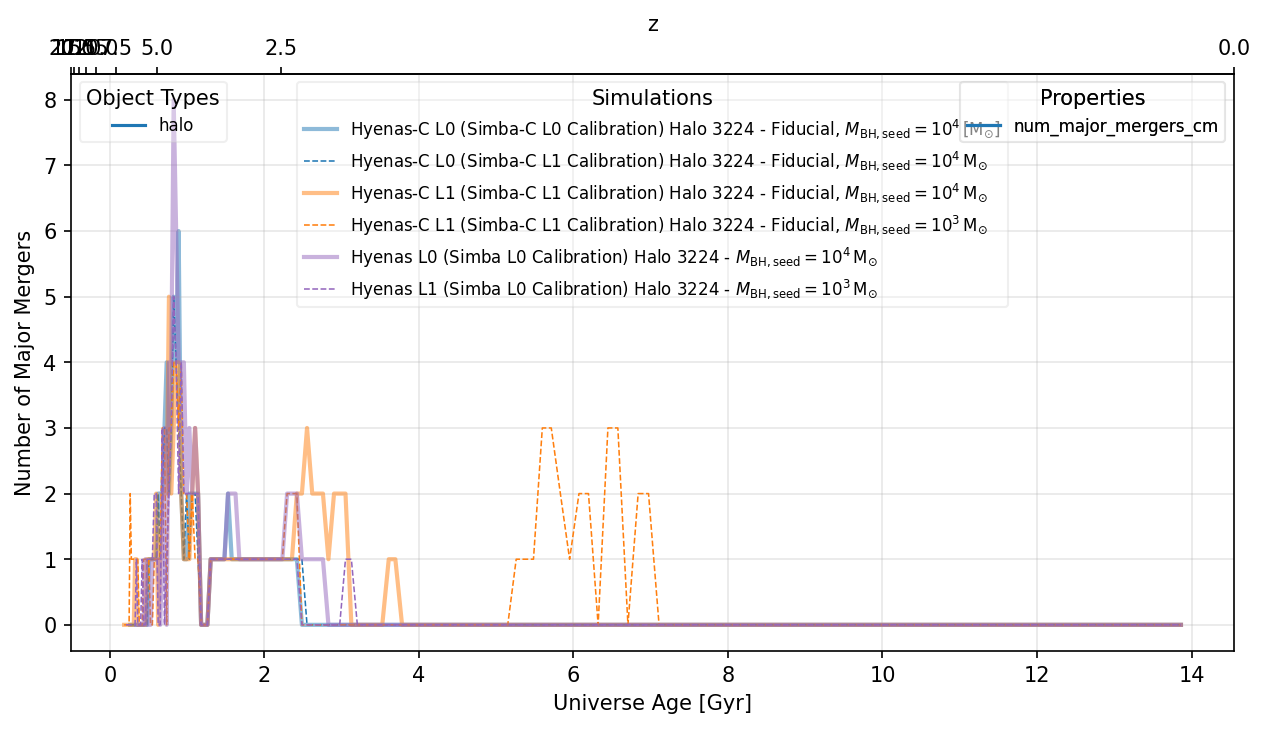

In [35]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'num_major_mergers_cm',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Number of Major Mergers'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C0', 'C0', 'C1', 'C1', 'C4', 'C4'],
    'ls':['-', '--', '-', '--', '-', '--'],
    'lw':[2, 0.75, 2, 0.75, 2, 0.75],
    'alpha':[0.5,1,0.5,1,0.5,1],
    'zorder':[1,2,3,4,5,6],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
# ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

1
1
1
1


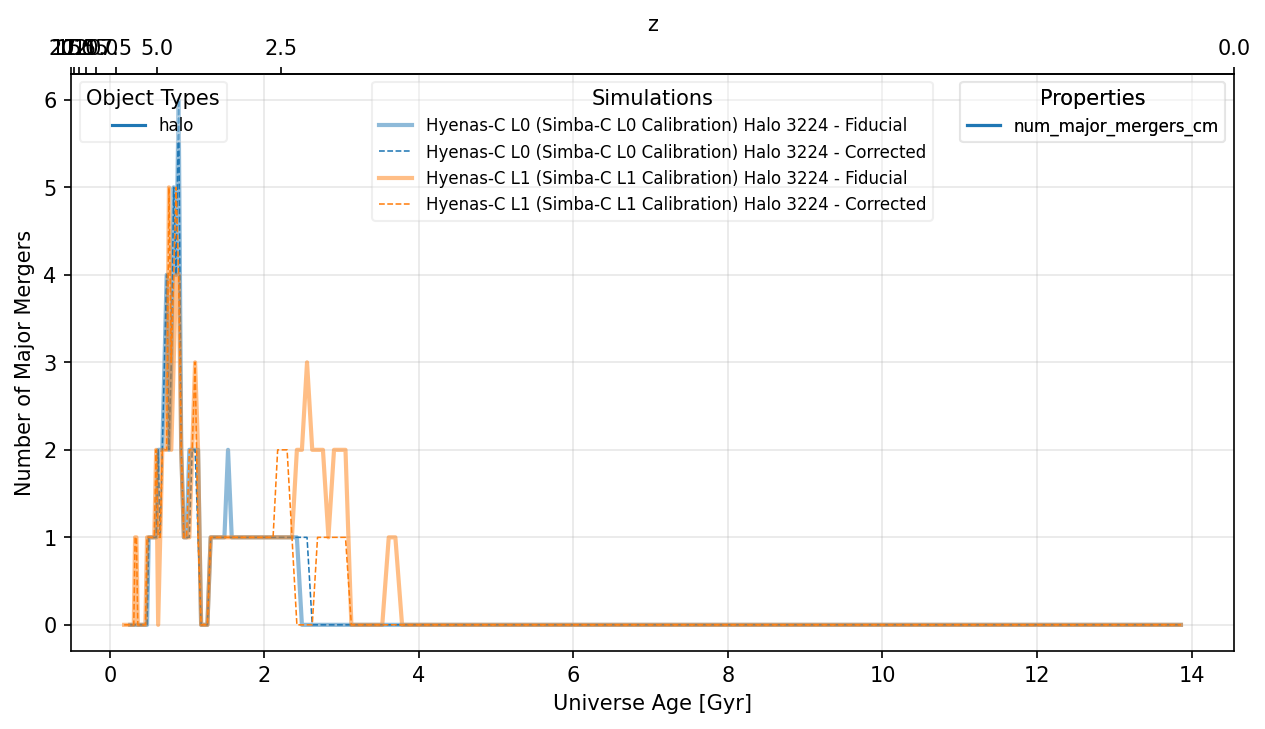

In [76]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'num_major_mergers_cm',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Number of Major Mergers'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', '-', '--'],
    'lw':[2, 0.75, 2, 0.75],
    'alpha':[0.5,1,0.5,1],
    'zorder':[1,2,3,4],
}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
# ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

### SFR & sSFR

Msun/yr
Msun/yr


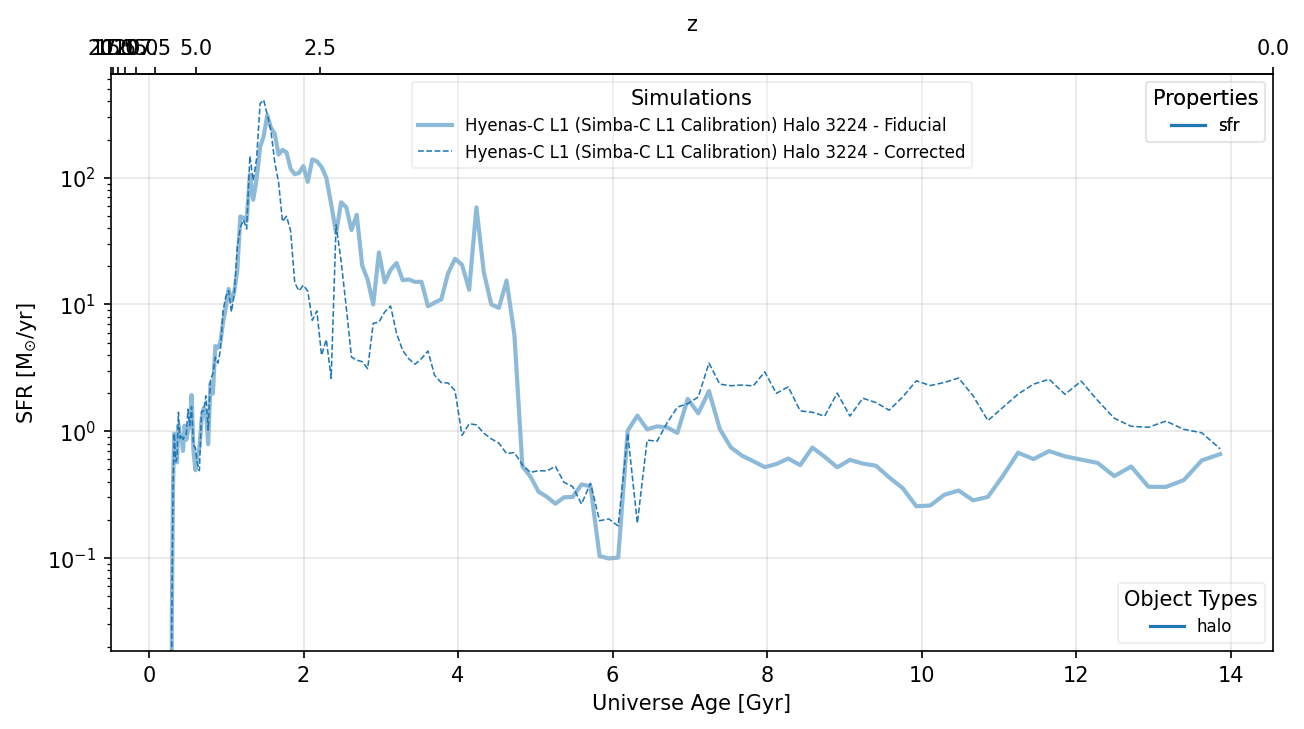

In [51]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'sfr',
    # 'sfr_100',
    # 'sfr_PartType0_r200c',
    # 'sfr_100Myr_PartType4_r200c',
    # 'sfr_PartType0_50ckpc',
    # 'sfr_100Myr_PartType4_50ckpc',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'SFR $[\mathrm{M_{\odot}/yr}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

Msun/yr
Msun/yr
Msun/yr
Msun/yr


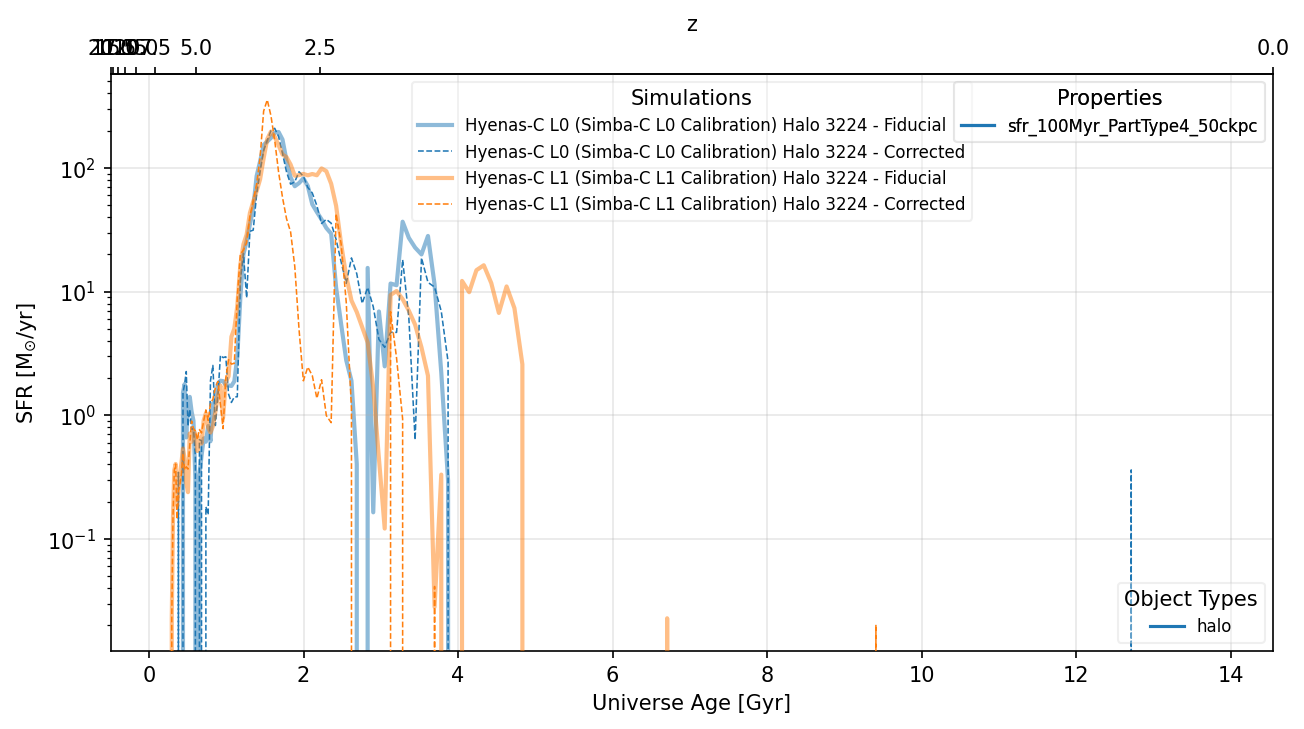

In [45]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'sfr',
    # 'sfr_100',
    'sfr_PartType0_r200c',
    # 'sfr_100Myr_PartType4_r200c',
    'sfr_PartType0_50ckpc',
    # 'sfr_100Myr_PartType4_50ckpc',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'SFR $[\mathrm{M_{\odot}/yr}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', '-', '--'],
    'lw':[2, 0.75, 2, 0.75],
    'alpha':[0.5,1,0.5,1],
    'zorder':[1,2,3,4],
}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr


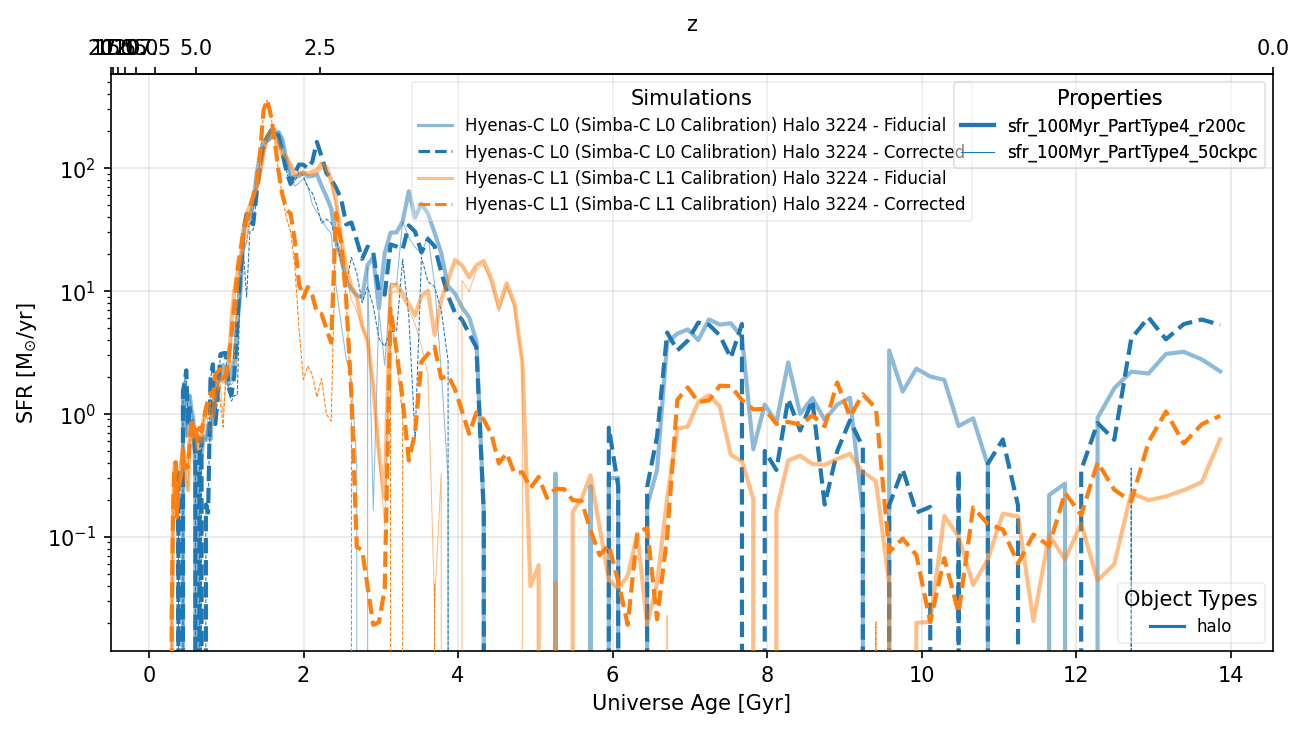

In [66]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'sfr',
    # 'sfr_100',
    # 'sfr_PartType0_r200c',
    'sfr_100Myr_PartType4_r200c',
    # 'sfr_PartType0_50ckpc',
    'sfr_100Myr_PartType4_50ckpc',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'SFR $[\mathrm{M_{\odot}/yr}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', '-', '--'],
    # 'lw':[2, 0.75, 2, 0.75],
    'alpha':[0.5,1,0.5,1],
    'zorder':[1,2,3,4],
}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    'lw':[2, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'sfr',
    'sfr_100',
    'sfr_PartType0_50ckpc',
    'sfr_100Myr_PartType4_50ckpc',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$SFR\,[\mathrm{M_{\odot}/yr}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

yr**-1
yr**-1
yr**-1
yr**-1


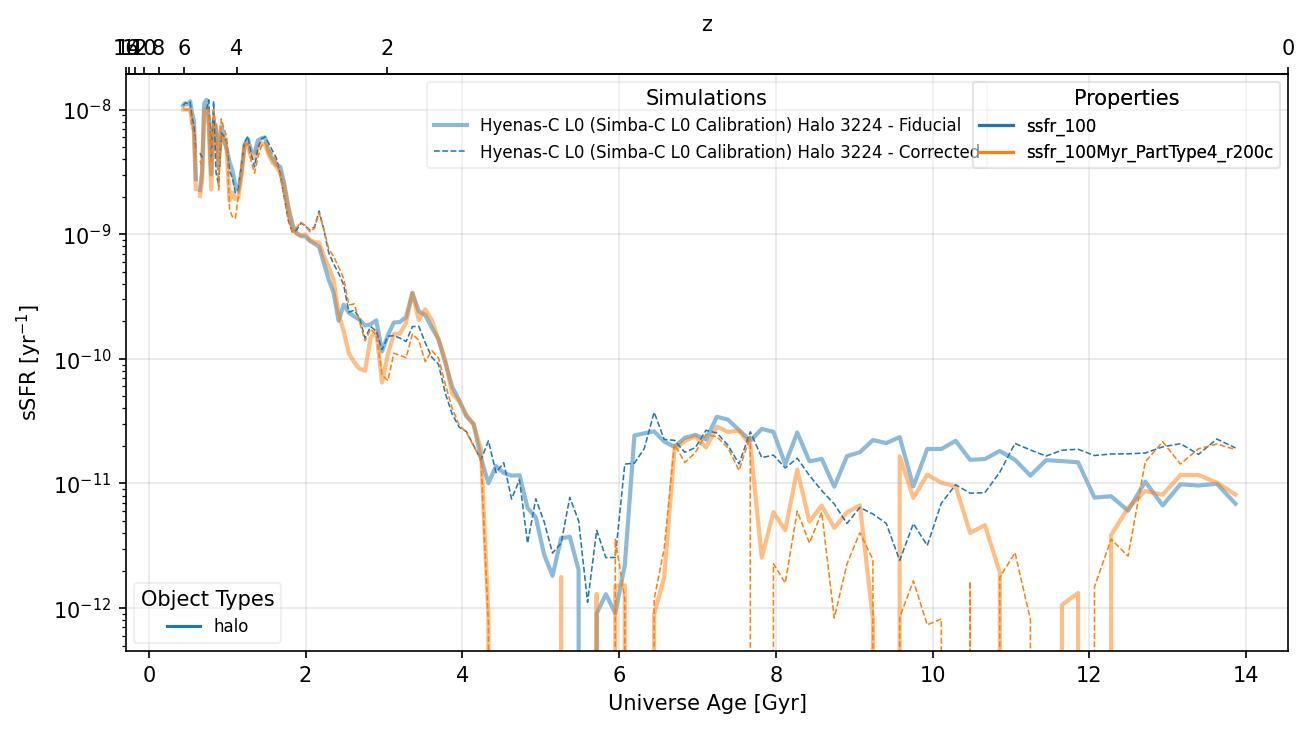

In [23]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'ssfr',
    'ssfr_100',
    # 'ssfr_PartType0_r200c',
    'ssfr_100Myr_PartType4_r200c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'sSFR $[\mathrm{yr^{-1}}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'ssfr',
    'ssfr_100',
    'ssfr_PartType0_50ckpc',
    'ssfr_100Myr_PartType4_50ckpc',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$sSFR\,[\mathrm{yr^{-1}}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
}
obj_plotting = {}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

Msun/yr
Msun/yr
Msun/yr
Msun/yr


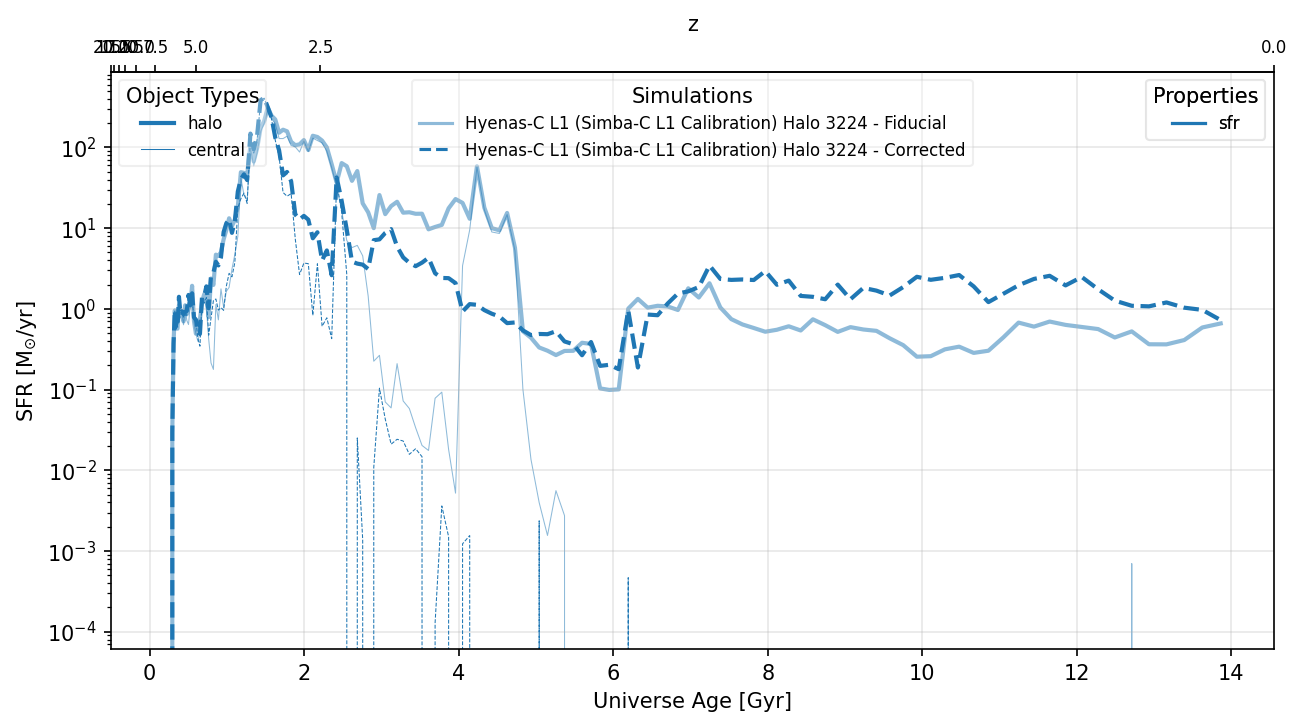

In [57]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'sfr',
    # 'sfr_100',
    # 'sfr_PartType0_r200c',
    # 'sfr_100Myr_PartType4_r200c',
                ]   # properties to loop over
obj_types = ['halo', 'central']                   # object types to loop over
y_label = r'SFR $[\mathrm{M_{\odot}/yr}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    # 'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')
ax_top.tick_params(which='both', labelsize=8, labelrotation=0)

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr


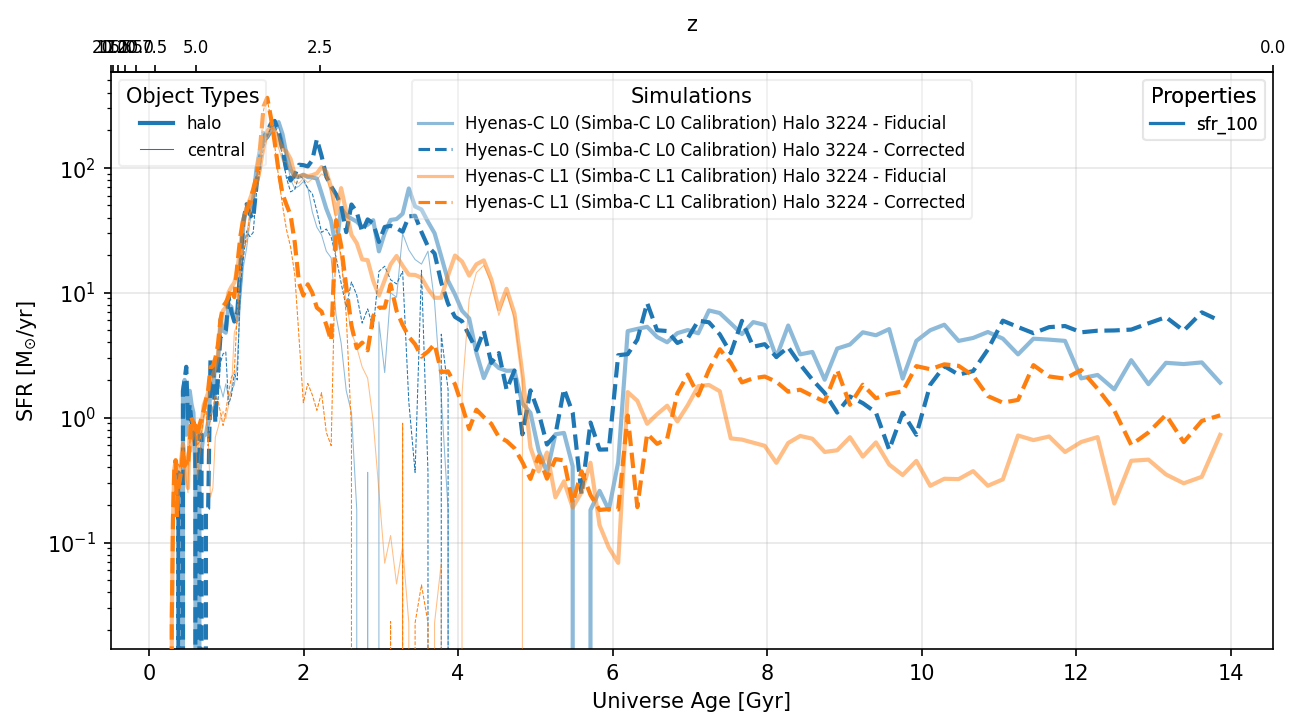

In [64]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'sfr',
    'sfr_100',
    # 'sfr_PartType0_r200c',
    # 'sfr_100Myr_PartType4_r200c',
                ]   # properties to loop over
obj_types = ['halo', 'central']                   # object types to loop over
y_label = r'SFR $[\mathrm{M_{\odot}/yr}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', '-', '--'],
    # 'lw':[2, 0.75, 2, 0.75],
    'alpha':[0.5,1,0.5,1],
    'zorder':[1,2,3,4],
}
obj_plotting = {
    'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')
ax_top.tick_params(which='both', labelsize=8, labelrotation=0)

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr
Msun/yr


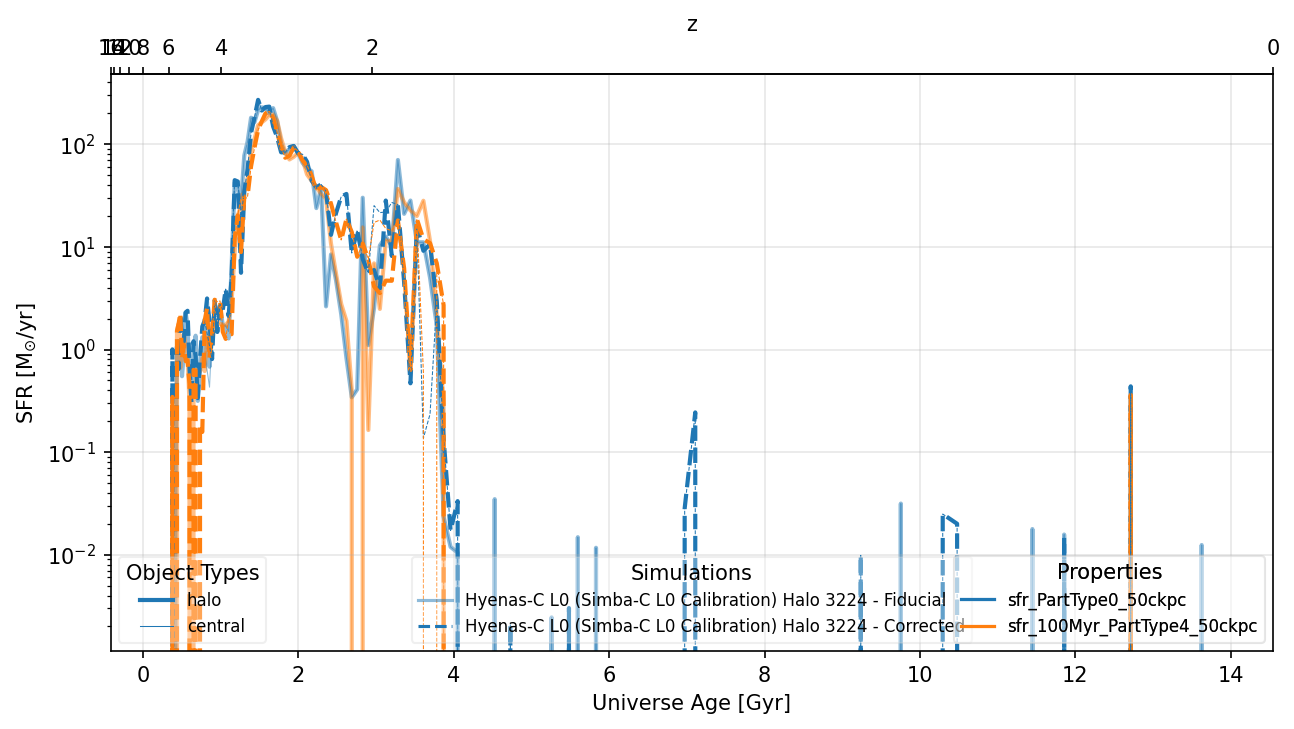

In [28]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'sfr',
    # 'sfr_100',
    # 'sfr_PartType0_r200c',
    # 'sfr_100Myr_PartType4_r200c',
    'sfr_PartType0_50ckpc',
    'sfr_100Myr_PartType4_50ckpc',
                ]   # properties to loop over
obj_types = ['halo', 'central']                   # object types to loop over
y_label = r'SFR $[\mathrm{M_{\odot}/yr}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    # 'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

### FoF Masses & Mass Fractions

Msun
Msun
Msun
Msun
Msun
Msun
Msun
Msun


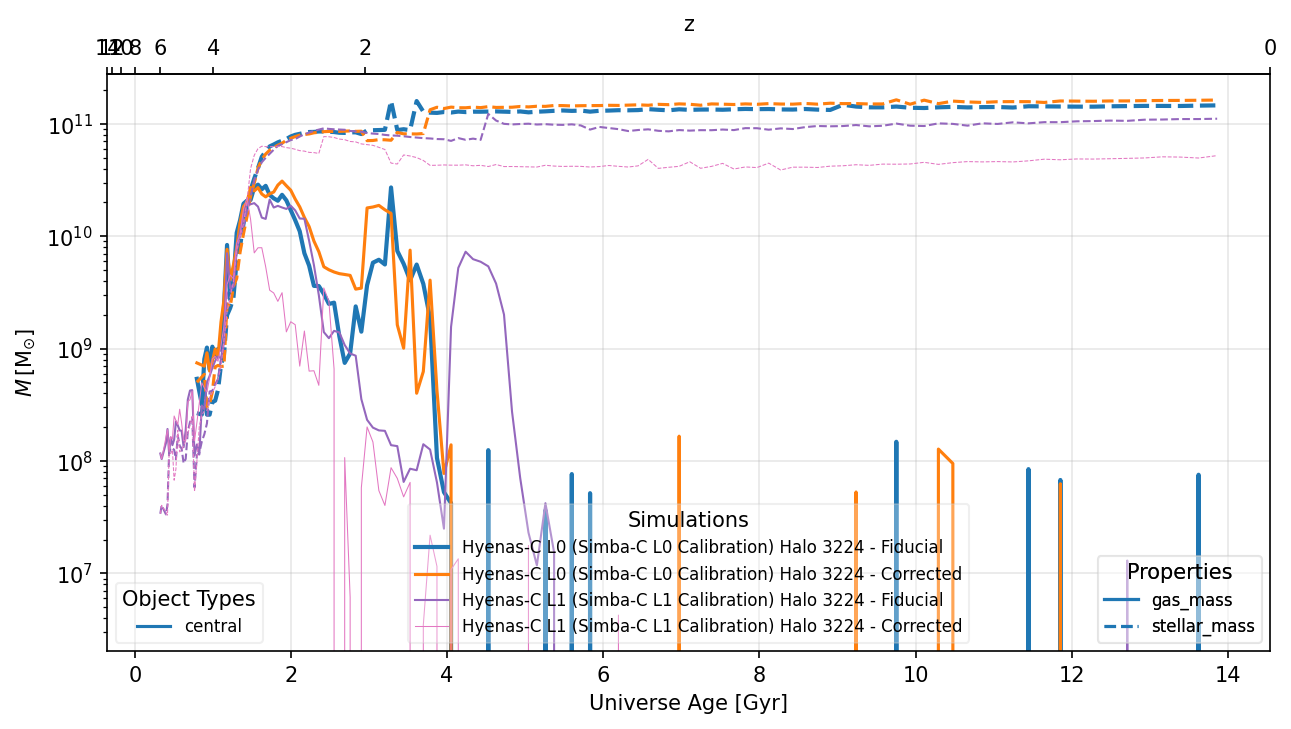

In [74]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'total_mass',
    # 'm200c',
    # 'm500c',
    # 'dm_mass',
    'gas_mass',
    # 'H2_mass',
    # 'HI_mass',
    # 'dust_mass',
    'stellar_mass',
    # 'bh_mass',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$M\,[\mathrm{M_{\odot}}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'ls':['-', '--'],
    'lw':[2, 1.5, 1, 0.5],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

Msun
Msun
Msun
Msun
Msun
Msun
Msun
Msun


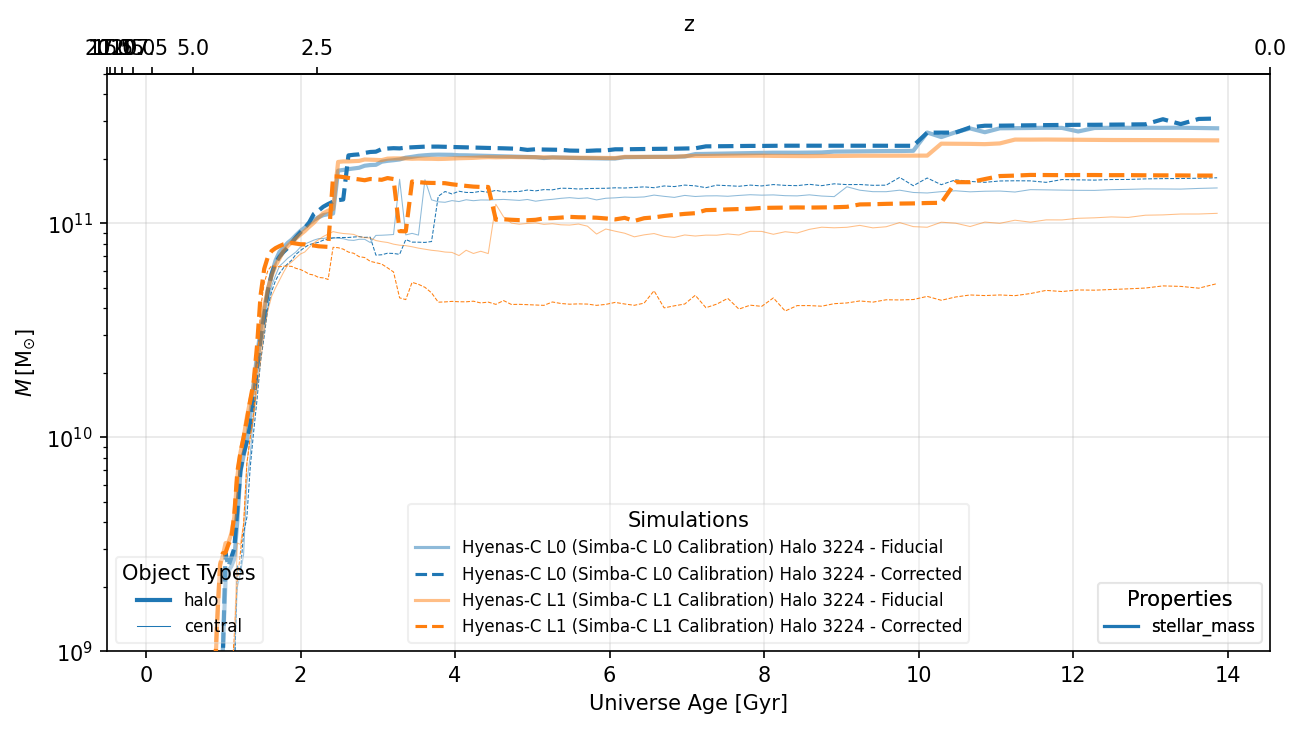

In [79]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'total_mass',
    # 'm200c',
    # 'm500c',
    # 'dm_mass',
    # 'gas_mass',
    # 'H2_mass',
    # 'HI_mass',
    # 'dust_mass',
    'stellar_mass',
    # 'bh_mass',
                ]   # properties to loop over
obj_types = ['halo', 'central']                   # object types to loop over
y_label = r'$M\,[\mathrm{M_{\odot}}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', '-', '--'],
    # 'lw':[2, 0.75, 2, 0.75],
    'alpha':[0.5,1,0.5,1],
    'zorder':[1,2,3,4],
}
obj_plotting = {
    'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

ax.set_ylim(1e9, 5e11)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

Msun
Msun
Msun
Msun
Msun
Msun


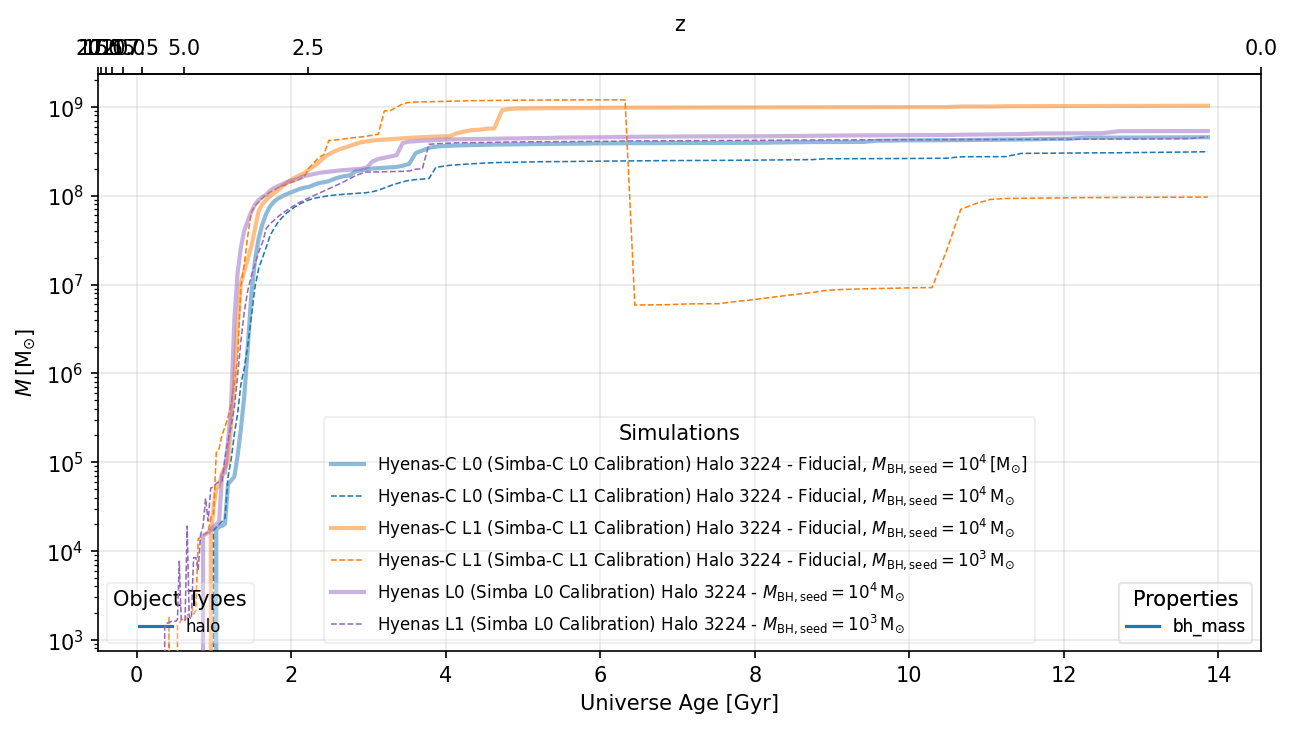

In [36]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'total_mass',
    # 'm200c',
    # 'm500c',
    # 'dm_mass',
    # 'gas_mass',
    # 'H2_mass',
    # 'HI_mass',
    # 'dust_mass',
    # 'stellar_mass',
    'bh_mass',
    # 'bh_30kpc_mass',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$M\,[\mathrm{M_{\odot}}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C0', 'C0', 'C1', 'C1', 'C4', 'C4'],
    'ls':['-', '--', '-', '--', '-', '--'],
    'lw':[2, 0.75, 2, 0.75, 2, 0.75],
    'alpha':[0.5,1,0.5,1,0.5,1],
    'zorder':[1,2,3,4,5,6],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                if y[-1] < 1: y*=1e10
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e9, 5e11)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_total-total',
    'f_dm-total',
    'f_gas-total',
    'f_H2-total',
    'f_HI-total',
    'f_dust-total',
    'f_stellar-total',
    'f_bh-total',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{total}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

### Aperture Masses & Mass Fractions

Msun
Msun
Msun
Msun
Msun
Msun


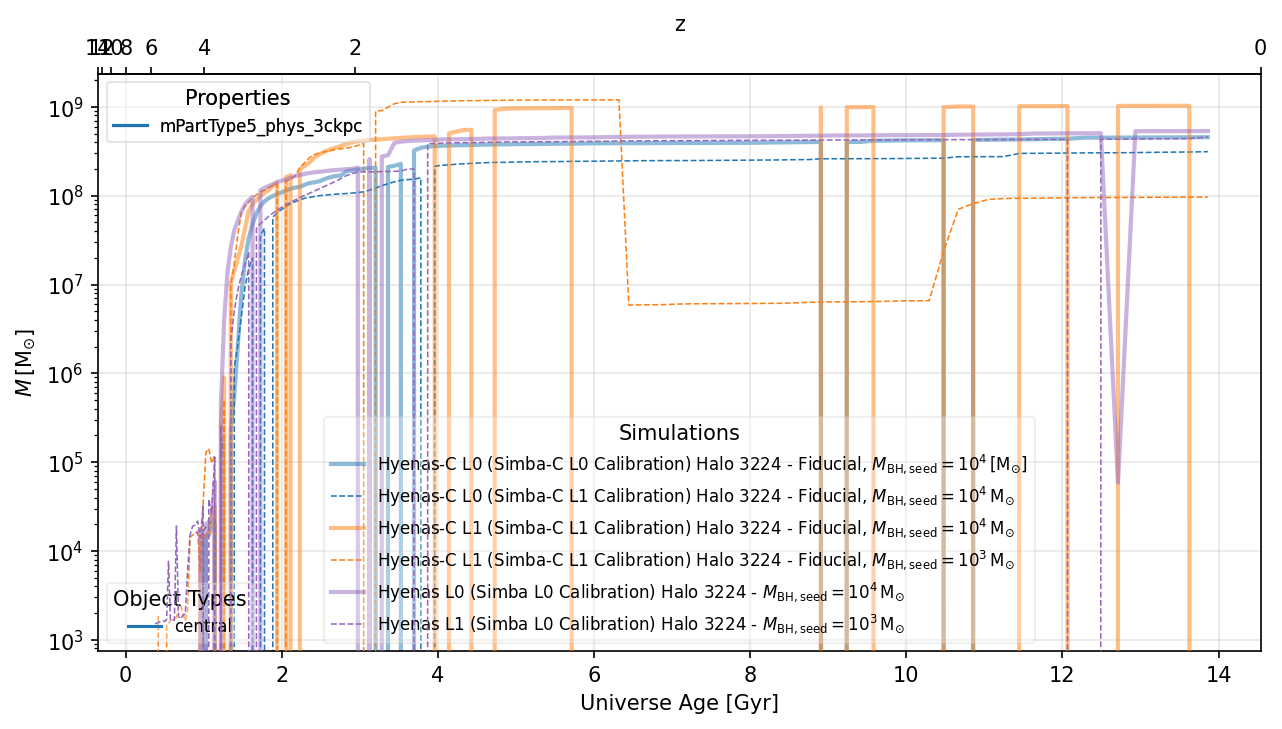

In [39]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'm_total_r200c',
    # 'mPartType1_3ckpc',
    # 'mPartType2_3ckpc',
    # 'mPartType0_r200c',
    # 'mPartType0_50ckpc',
    # 'mPartType0_30ckpc',
    # 'mPartType4_50ckpc',
    # 'mPartType4_30ckpc',
    # 'mPartType5_3ckpc',
    # 'mPartType5_phys_r200c',
    'mPartType5_phys_3ckpc',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$M\,[\mathrm{M_{\odot}}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'color':['C0', 'C0', 'C1', 'C1', 'C4', 'C4'],
    'ls':['-', '--', '-', '--', '-', '--'],
    'lw':[2, 0.75, 2, 0.75, 2, 0.75],
    'alpha':[0.5,1,0.5,1,0.5,1],
    'zorder':[1,2,3,4,5,6],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

Msun
Msun
Msun
Msun
Msun
Msun
Msun
Msun


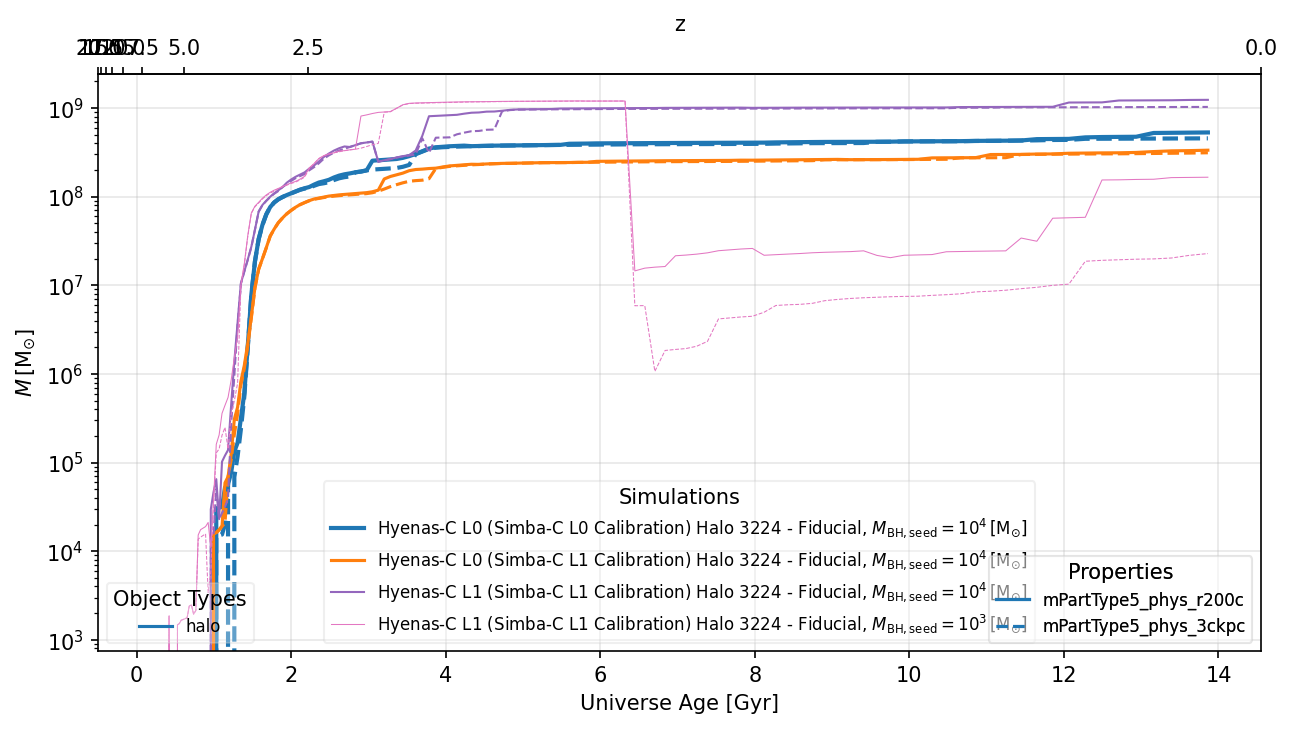

In [20]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    # 'm_total_r200c',
    # 'mPartType1_3ckpc',
    # 'mPartType2_3ckpc',
    # 'mPartType0_r200c',
    # 'mPartType0_50ckpc',
    # 'mPartType0_30ckpc',
    # 'mPartType4_50ckpc',
    # 'mPartType4_30ckpc',
    # 'mPartType5_3ckpc',
    'mPartType5_phys_r200c',
    'mPartType5_phys_3ckpc',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$M\,[\mathrm{M_{\odot}}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'ls':['-', '--'],
    'lw':[2, 1.5, 1, 0.5],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

Msun
Msun
Msun
Msun
Msun
Msun
Msun
Msun
Msun
Msun
Msun
Msun
Msun
Msun
Msun


IndexError: list index out of range

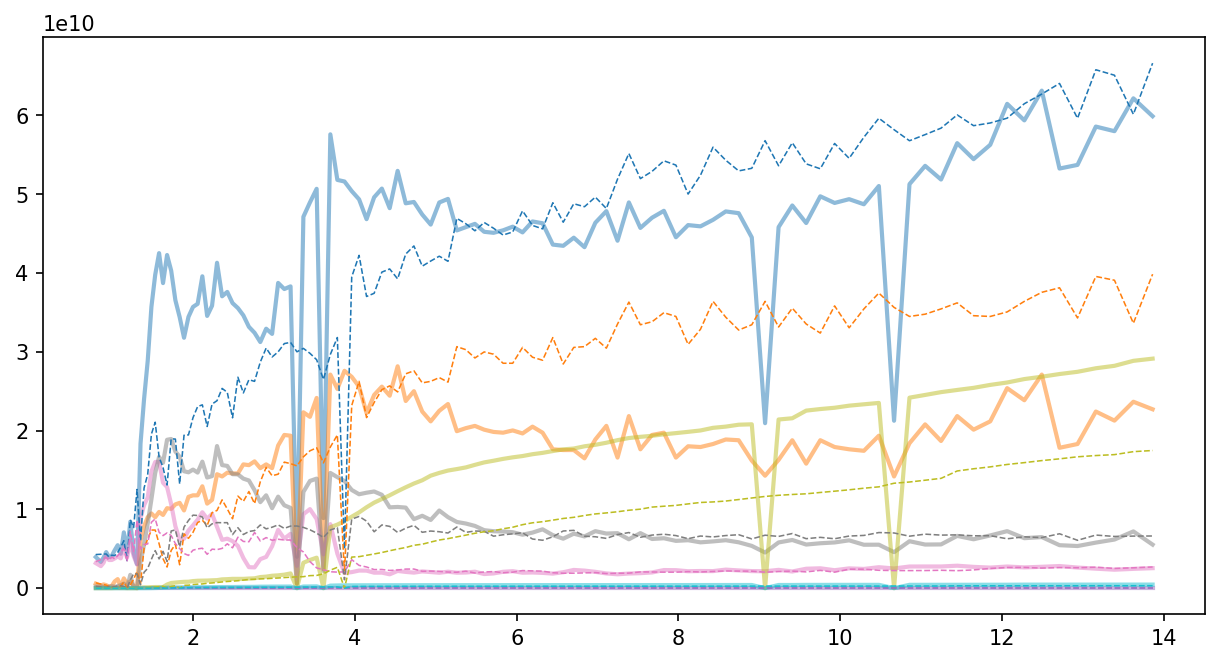

In [19]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'm_total_3ckpc',
    'mPartType1_3ckpc',
    'mPartType2_3ckpc',
    'mPartType0_3ckpc',
    'mPartType4_3ckpc',
    'mPartType5_3ckpc',
    'mPartType5_phys_3ckpc',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$M\,[\mathrm{M_{\odot}}]$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_total_3ckpc-total',
    'f_PartType1_3ckpc-total',
    'f_PartType2_3ckpc-total',
    'f_PartType0_3ckpc-total',
    'f_PartType4_3ckpc-total',
    'f_PartType5_3ckpc-total',
    'f_PartType5_phys_3ckpc-total',
                ]   # properties to loop over
obj_types = ['central']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{total}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

### Number of BHs within Apertures

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'nPartType5_3ckpc',
    'nPartType5_no_accretion_3ckpc',
    # 'nPartType5_quasar_3ckpc',
    # 'nPartType5_quasar_ascale_3ckpc',
    'nPartType5_quasar_high_fedd_3ckpc',
    'nPartType5_quasar_low_fedd_3ckpc',
    # 'nPartType5_quasar_low_fedd_ascale_r200c',
    # 'nPartType5_quasar_fedd<0.02_r200c',
    # 'nPartType5_quasar_fedd<0.02_ascale_r200c',
    # 'nPartType5_quasar_fedd<0.002_r200c',
    # 'nPartType5_quasar_fedd<0.002_ascale_r200c',
    # 'nPartType5_jets_3ckpc',
    # 'nPartType5_jets_ascale_3ckpc',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$N_{\mathrm{BH}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
# ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='center left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

### Gas Phase Masses & Mass Fractions

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'mPartType0_r200c',
    # 'mPartType0_Aviv_coupled_gas_r200c',
    'mPartType0_Sokolowska+2018_cold_r200c',
    'mPartType0_Sokolowska+2018_warm_r200c',
    'mPartType0_Sokolowska+2018_warm_hot_r200c',
    'mPartType0_Sokolowska+2018_hot_r200c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass $\mathrm{M_{\odot}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_r200c-total',
    # 'mPartType0_Aviv_coupled_gas_r200c',
    'f_PartType0_Sokolowska+2018_cold_r200c-total',
    'f_PartType0_Sokolowska+2018_warm_r200c-total',
    'f_PartType0_Sokolowska+2018_warm_hot_r200c-total',
    'f_PartType0_Sokolowska+2018_hot_r200c-total',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{total}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='center right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_r200c-gas',
    # 'mPartType0_Aviv_coupled_gas_r200c',
    'f_PartType0_Sokolowska+2018_cold_r200c-gas',
    'f_PartType0_Sokolowska+2018_warm_r200c-gas',
    'f_PartType0_Sokolowska+2018_warm_hot_r200c-gas',
    'f_PartType0_Sokolowska+2018_hot_r200c-gas',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'mPartType0_r200c',
    'mPartType0_vandeVoort+2011_diffuse_IGM_r200c',
    'mPartType0_vandeVoort+2011_cold_halo_gas_r200c',
    'mPartType0_vandeVoort+2011_WHIM_r200c',
    'mPartType0_vandeVoort+2011_ICM_r200c',
    'mPartType0_vandeVoort+2011_star_forming_ISM_r200c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass $\mathrm{M_{\odot}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_r200c-total',
    'f_PartType0_vandeVoort+2011_diffuse_IGM_r200c-total',
    'f_PartType0_vandeVoort+2011_cold_halo_gas_r200c-total',
    'f_PartType0_vandeVoort+2011_WHIM_r200c-total',
    'f_PartType0_vandeVoort+2011_ICM_r200c-total',
    'f_PartType0_vandeVoort+2011_star_forming_ISM_r200c-total',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{total}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_r200c-gas',
    'f_PartType0_vandeVoort+2011_diffuse_IGM_r200c-gas',
    'f_PartType0_vandeVoort+2011_cold_halo_gas_r200c-gas',
    'f_PartType0_vandeVoort+2011_WHIM_r200c-gas',
    'f_PartType0_vandeVoort+2011_ICM_r200c-gas',
    'f_PartType0_vandeVoort+2011_star_forming_ISM_r200c-gas',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'mPartType0_r200c',
    'mPartType0_vandeVoort+2011_super_virial_r200c',
    'mPartType0_vandeVoort+2011_sub_virial_r200c',
    'mPartType0_dave+2019_super_virial_r200c',
    'mPartType0_dave+2019_sub_virial_r200c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass $\mathrm{M_{\odot}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_r200c-gas',
    'f_PartType0_vandeVoort+2011_super_virial_r200c-gas',
    'f_PartType0_vandeVoort+2011_sub_virial_r200c-gas',
    'f_PartType0_dave+2019_super_virial_r200c-gas',
    'f_PartType0_dave+2019_sub_virial_r200c-gas',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

### Hydrodynamically Coupled vs Uncoupled Gas Masses & Mass Fractions

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'mPartType0_r200c',
    'mPartType0_Aviv_coupled_gas_r200c',
    'mPartType0_Aviv_decoupled_gas_r200c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass $\mathrm{M_{\odot}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_r200c-gas',
    'f_PartType0_Aviv_coupled_gas_r200c-gas',
    'f_PartType0_Aviv_decoupled_gas_r200c-gas',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

### Launched vs Unlaunched (in Wind) Gas Masses & Mass Fractions

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'mPartType0_r200c',
    'mPartType0_Aviv_launched_wind_r200c',
    'mPartType0_Aviv_unlaunched_wind_r200c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass $\mathrm{M_{\odot}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_r200c-gas',
    'f_PartType0_Aviv_launched_wind_r200c-gas',
    'f_PartType0_Aviv_unlaunched_wind_r200c-gas',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

### Outflow/Inflow Gas Masses & Mass Fractions

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'mPartType0_r200c',
    'mPartType0_Aviv_outflow>0_r200c',
    'mPartType0_Aviv_outflow>0_nowind_r200c',
    'mPartType0_Aviv_outflow>0_onlywind_r200c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass $\mathrm{M_{\odot}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'mPartType0_r200c',
    'mPartType0_Aviv_outflow>0_r200c',
    # 'mPartType0_Aviv_outflow>0_nowind_r200c',
    # 'mPartType0_Aviv_outflow>0_onlywind_r200c',
    'mPartType0_Aviv_outflow>1000_r200c',
    'mPartType0_Aviv_outflow>5000_r200c',
    'mPartType0_Aviv_outflow>10000_r200c',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'Mass $\mathrm{M_{\odot}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_50ckpc-gas',
    'f_PartType0_Aviv_outflow>0_50ckpc-gas',
    # 'f_PartType0_Aviv_outflow>0_nowind_r200c',
    # 'f_PartType0_Aviv_outflow>0_onlywind_r200c',
    'f_PartType0_Aviv_outflow>1000_50ckpc-gas',
    'f_PartType0_Aviv_outflow>5000_50ckpc-gas',
    'f_PartType0_Aviv_outflow>10000_50ckpc-gas',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='upper right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_r200c-gas',
    'f_PartType0_Aviv_outflow>0_r200c-gas',
    'f_PartType0_Aviv_inflow>0_r200c-gas',
    'f_PartType0_Aviv_outflow>0_50ckpc-gas',
    'f_PartType0_Aviv_inflow>0_50ckpc-gas',
    # 'f_PartType0_Aviv_outflow>0_nowind_r200c',
    # 'f_PartType0_Aviv_outflow>0_onlywind_r200c',
    # 'f_PartType0_Aviv_outflow>1000_50ckpc-gas',
    # 'f_PartType0_Aviv_outflow>5000_50ckpc-gas',
    # 'f_PartType0_Aviv_outflow>10000_50ckpc-gas',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower center', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

In [ ]:
# single-panel multi-loop plotting utility
# - loops over sim_dict, obj_types and props_to_plot
# - bottom x-axis: Universe Age [Gyr]
# - top x-axis: corresponding redshift (interpolated from available age<->z pairs)
# - colour -> simulation, linestyle -> obj_type, marker -> property
# - three separate legends: simulations, obj_types, properties

# Customize these lists / label as needed
props_to_plot = [
    'f_PartType0_r200c-gas',
    'f_PartType0_Aviv_outflow0-300_onlywind_r200c-gas',
    # 'f_PartType0_Aviv_outflow>0_nowind_r200c',
    # 'f_PartType0_Aviv_outflow>0_onlywind_r200c',
    'f_PartType0_Aviv_outflow300-1000_onlywind_r200c-gas',
    'f_PartType0_Aviv_outflow1000-10000_onlywind_r200c-gas',
                ]   # properties to loop over
obj_types = ['halo']#, 'central']                   # object types to loop over
y_label = r'$f_X \equiv M_X/M_{\mathrm{gas}}$'         # y-axis label (you can include units here)

# plotting appearance (easy to change)
# sim_names = list(sim_dict.keys())
# cmap = matplotlib.cm.get_cmap('tab10')
sim_plotting = {
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'ls':['-', '--'],
    'lw':[2, 0.75],
    'alpha':[0.5,1],
    'zorder':[1,2],
}
obj_plotting = {
    # 'lw':[2, 0.5],
}
prop_plotting = {
    'marker':[None]*10,
    'mfc':['none']*10,
    'mec':['none']*10,
    'ms':[5]*10,
    'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    # 'ls':['-', '--', ':', '-.', (0,(3,1,1,1,1,1)), (0,(1,1)), '-', '--', ':', '-.'],
    # 'ls':['-', '--', '-', '--'],
    # 'lw':[2, 1.5, 1, 0.5],
    # 'lw':[3, 2.5, 2, 1.5, 1],
    # 'lw':[1,1,1,1,1,1,1,1],
    # 'lw':[2,2,2,2,2,2,2,2],
    # 'alpha':[1]*10,
    # 'alpha':[1, 1, 1, 0.5],
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

# collect age<->z pairs across everything to build a consistent mapping
ages_all = []
zs_all = []
for sim, sim_info in sim_dict.items():
    for obj in obj_types:
        try:
            a = sim_info['halo_props'][obj]['age'][:]
            z = sim_info['halo_props'][obj]['z'][:]
        except Exception:
            continue
        ages_all.append(a)
        zs_all.append(z)

if len(ages_all) == 0:
    raise RuntimeError("No age/z arrays found for the requested obj_types in the available simulations.")

ages_cat = np.concatenate(ages_all)
zs_cat = np.concatenate(zs_all)
# sort by increasing age (age increases, z decreases) and remove duplicates
order = np.argsort(ages_cat)
ages_sorted = ages_cat[order]
zs_sorted = zs_cat[order]
ages_unique, idx = np.unique(ages_sorted, return_index=True)
zs_unique = zs_sorted[idx]

# interpolation functions for secondary axis
def age_to_z(age):
    return np.interp(age, ages_unique, zs_unique)

def z_to_age(z):
    # inverse interpolation (zs_unique may be decreasing; ensure monotonic for interp)
    # here we sort by z increasing for inverse interp
    z_order = np.argsort(zs_unique)
    zs_for_inv = zs_unique[z_order]
    ages_for_inv = ages_unique[z_order]
    return np.interp(z, zs_for_inv, ages_for_inv)

# main plotting loop
handles_sim = []
handles_obj = []
handles_prop = []
seen_sim = set()
seen_obj = set()
seen_prop = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    # sim_info = sim_dict[sim]
    # color = sim_colors[sim]

    for obj_counter, obj in enumerate(obj_types):
        # linestyle = obj_linestyles.get(obj, '-')
        # try to access age array for x
        try:
            age_arr = sim_info['halo_props'][obj]['age'][:]
        except Exception:
            # missing object type for this simulation
            continue

        for prop_counter, prop in enumerate(props_to_plot):
            try:
                y_ds = sim_info['halo_props'][obj][prop]
                y = y_ds[:]
                y_units = y_ds.attrs['units']
                print(y_units)
            except Exception:
                # property missing -> skip
                print(f'Missing {prop}')
                continue

            # marker = prop_markers.get(prop, 'o')

            sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
            obj_plotting_curr = {name:vals[obj_counter] for name, vals in obj_plotting.items()}
            prop_plotting_curr = {name:vals[prop_counter] for name, vals in prop_plotting.items()}
            
            
            # ax.plot(age_arr, y,
            #         color=line_color, ls=linestyle, marker=marker,
            #         mfc='none', mec=marker_color, ms=marker_size, alpha=alpha)
            ax.plot(age_arr, y,
                    **sim_plotting_curr, **obj_plotting_curr, **prop_plotting_curr)

            # build legend handles (only once per category)
            if sim not in seen_sim:
                # handles_sim.append(Line2D([], [], color=color, ls='', marker='s', mfc=color, mec=color, label=sim))
                handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
                seen_sim.add(sim)
            if obj not in seen_obj:
                # handles_obj.append(Line2D([], [], color='black', ls=linestyle, marker='', label=obj))
                handles_obj.append(Line2D([], [], **obj_plotting_curr, label=obj))
                seen_obj.add(obj)
            if prop not in seen_prop:
                # handles_prop.append(Line2D([], [], color='black', ls='', marker=marker, mfc='none', mec='black', label=prop))
                handles_prop.append(Line2D([], [], **prop_plotting_curr, label=prop))
                seen_prop.add(prop)

# axis labels and scales (adjust if you want log x/y)
ax.set_xlabel('Universe Age [Gyr]')
ax.set_ylabel(y_label)
ax.set_yscale('log')
ax.grid(alpha=0.3)

# ax.set_ylim(1e41, 1e47)

# top axis showing redshift
ax_top = ax.secondary_xaxis('top', functions=(age_to_z, z_to_age))
ax_top.set_xlabel('z')

# place 3 legends: simulations, obj_types, properties
# simulations legend (colors) - upper left
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)
# object types legend (linestyles) - upper right
leg_obj = ax.legend(handles=handles_obj, title='Object Types', loc='center right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_obj)
# properties legend (markers) - lower left
leg_prop = ax.legend(handles=handles_prop, title='Properties', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_prop)

plt.show()

### BH Luminosities

## z=0 Scaling Relations

### Observational data

In [58]:
def get_directory_structure(rootdir):
    """
    Creates a nested dictionary that represents the folder structure of rootdir
    """
    dir = {}
    rootdir = rootdir.rstrip(os.sep)
    start = rootdir.rfind(os.sep) + 1
    for path, dirs, files in os.walk(rootdir):
        folders = path[start:].split(os.sep)
        subdir = dict.fromkeys(files)
        parent = reduce(dict.get, folders[:-1], dir)
        parent[folders[-1]] = subdir
    return dir

In [59]:
def pathto_dict(path_):
    for root, dirs, files in os.walk(path_):
        tree = {"name": root, "type":"folder", "children":[]}
        tree["children"].extend([pathto_dict(os.path.join(root, d)) for d in dirs])
        tree["children"].extend([{"name":os.path.join(root, f), "type":"file"} for f in files])
        return tree

In [60]:
def dict_walk(d, root, a=[]):
    for k, v in d.items():
        if type(v) == dict:
            dict_walk(v, root, a=np.append(a,k))
        else:
            if k.lower().endswith('.hdf5'):
                file = root
                for thing in a:
                    file = os.path.join(file, thing)
                file = os.path.join(file, k)
                observation = load_observations(file)[0]
                d[k] = observation

In [63]:
from functools import reduce
import swiftsimio
from velociraptor.observations import load_observation, load_observations

In [64]:
observation_root = '/project/rrg-babul-ad/aspadawe/data/observations/'
observation_root0 = '/project/rrg-babul-ad/aspadawe/data/'
observational_data = get_directory_structure(observation_root)
# observational_data
# observational_data = pathto_dict(observation_root)
# observational_data
dict_walk(observational_data, observation_root0)

In [65]:
observational_data

{'observations': {'bhmsm': {'Bentz18': {'B18_bhmsm_gal_binned_log_mean.hdf5': <velociraptor.observations.objects.ObservationalData at 0x1494906606e0>,
    'B18_bhmsm_gal_binned_log_median.hdf5': <velociraptor.observations.objects.ObservationalData at 0x149490612fd0>,
    'B18_bhmsm_gal_binned_log_unlog_mean.hdf5': <velociraptor.observations.objects.ObservationalData at 0x149490613b10>,
    'B18_bhmsm_gal_binned_log_unlog_median.hdf5': <velociraptor.observations.objects.ObservationalData at 0x1494906735c0>,
    'B18_bhmsm_gal_exact_count_binned_log_mean.hdf5': <velociraptor.observations.objects.ObservationalData at 0x149490673820>,
    'B18_bhmsm_gal_exact_count_binned_log_median.hdf5': <velociraptor.observations.objects.ObservationalData at 0x14949051c4d0>,
    'B18_bhmsm_gal_exact_count_binned_log_unlog_mean.hdf5': <velociraptor.observations.objects.ObservationalData at 0x1494906896a0>,
    'B18_bhmsm_gal_exact_count_binned_log_unlog_median.hdf5': <velociraptor.observations.objects.Ob

In [18]:
def smhmr_func_behroozi10(Mstar, logM1, Mstar0, beta, delta, gamma, sigma_logM):
    x = Mstar/Mstar0
    logMhalo = logM1 + beta*np.log10(x) + (x**delta)/(1+x**(-gamma)) - 0.5
    Mhalo = 10**logMhalo
    Mhalo_lo = 10**(logMhalo - sigma_logM)
    Mhalo_hi = 10**(logMhalo + sigma_logM)
    return Mhalo, Mhalo_lo, Mhalo_hi

### Plot Simulations and Observations

Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Fiducial
Msun
Msun
Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Corrected
Msun
Msun
Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Fiducial
Msun
Msun
Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Corrected
Msun
Msun


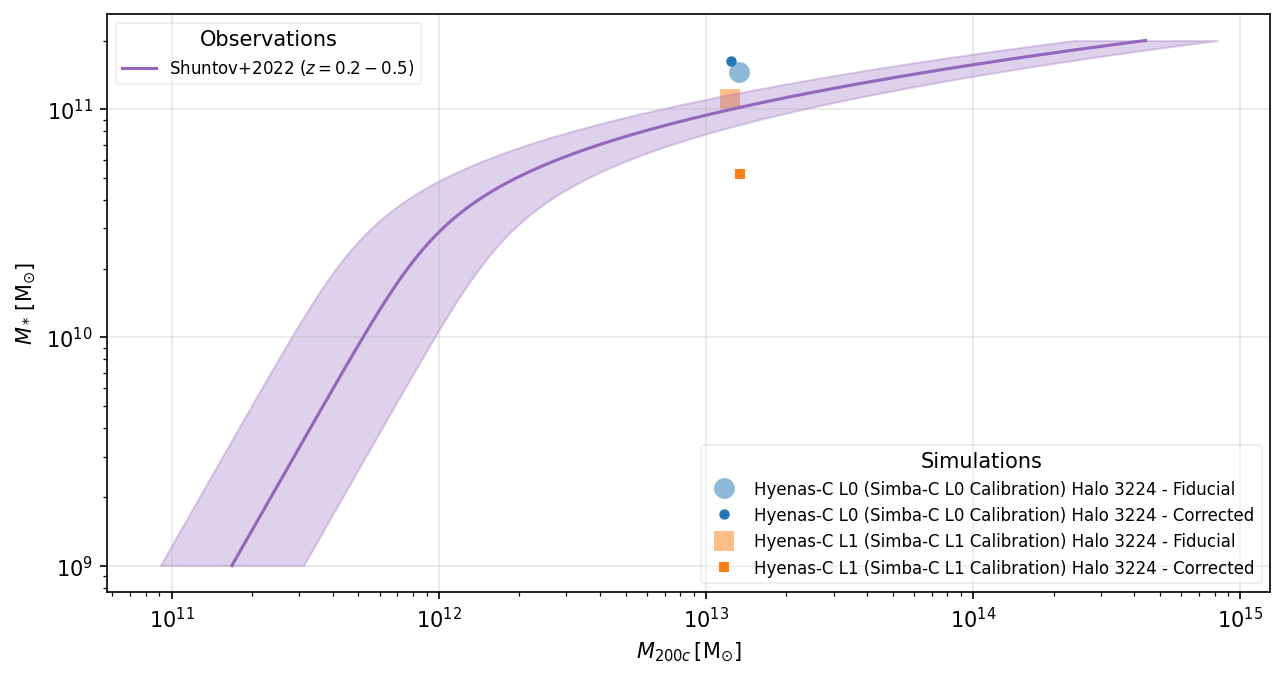

In [72]:
x_prop = ['halo', 'm200c']
y_prop = ['central', 'stellar_mass']

x_label = r'$M_{200c}\,[\mathrm{M_{\odot}}]$'
y_label = r'$M_*\,[\mathrm{M_{\odot}}]$'

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

sim_plotting = {
    'marker':['o', 'o', 's', 's'],
    'mfc':['C0', 'C0', 'C1', 'C1'],
    'mec':['none']*10,
    'ms':[10, 5, 10, 5],
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['']*10,
    # 'lw':[2, 0.75],
    'alpha':[0.5, 1, 0.5, 1],
    'zorder':[1, 2, 1, 2],
}

# Simulation plotting loop
handles_sim = []
seen_sim = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    try:
        x_ds = sim_info['halo_props'][x_prop[0]][x_prop[1]]
        x = x_ds[:][-1]
        x_units = x_ds.attrs['units']
        print(x_units)
    except Exception:
        # property missing -> skip
        print(f'Missing {x_prop}')
        continue
    
    try:
        y_ds = sim_info['halo_props'][y_prop[0]][y_prop[1]]
        y = y_ds[:][-1]
        y_units = y_ds.attrs['units']
        print(y_units)
    except Exception:
        # property missing -> skip
        print(f'Missing {y_prop}')
        continue


    sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
    ax.plot(x, y, **sim_plotting_curr)


    # build legend handles (only once per category)
    if sim not in seen_sim:
        handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
        seen_sim.add(sim)



# Observation Plotting
Mstar = np.linspace(1e9, 2e11, 1000)

# z=0.2-0.5 from Shunto+2022
Mhalo_shuntov22, Mhalo_lo_shuntov22, Mhalo_hi_shuntov22 = smhmr_func_behroozi10(Mstar, logM1=12.629, Mstar0=10**10.855, beta=0.487, delta=0.935, gamma=1.939, sigma_logM=0.268)

ax.plot(Mhalo_shuntov22, Mstar, color='C4', label=r'Shuntov+2022 ($z=0.2-0.5$)')
ax.fill_betweenx(y=Mstar, x1=Mhalo_lo_shuntov22, x2=Mhalo_hi_shuntov22, color='C4', alpha=0.3)





ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(alpha=0.3)

# place legends: simulations
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)

ax.legend(title='Observations', loc='upper left', fontsize=8, framealpha=0.3)

Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Fiducial
Msun
Msun
Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Corrected
Msun
Msun
Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Fiducial
Msun
Msun
Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Corrected
Msun
Msun


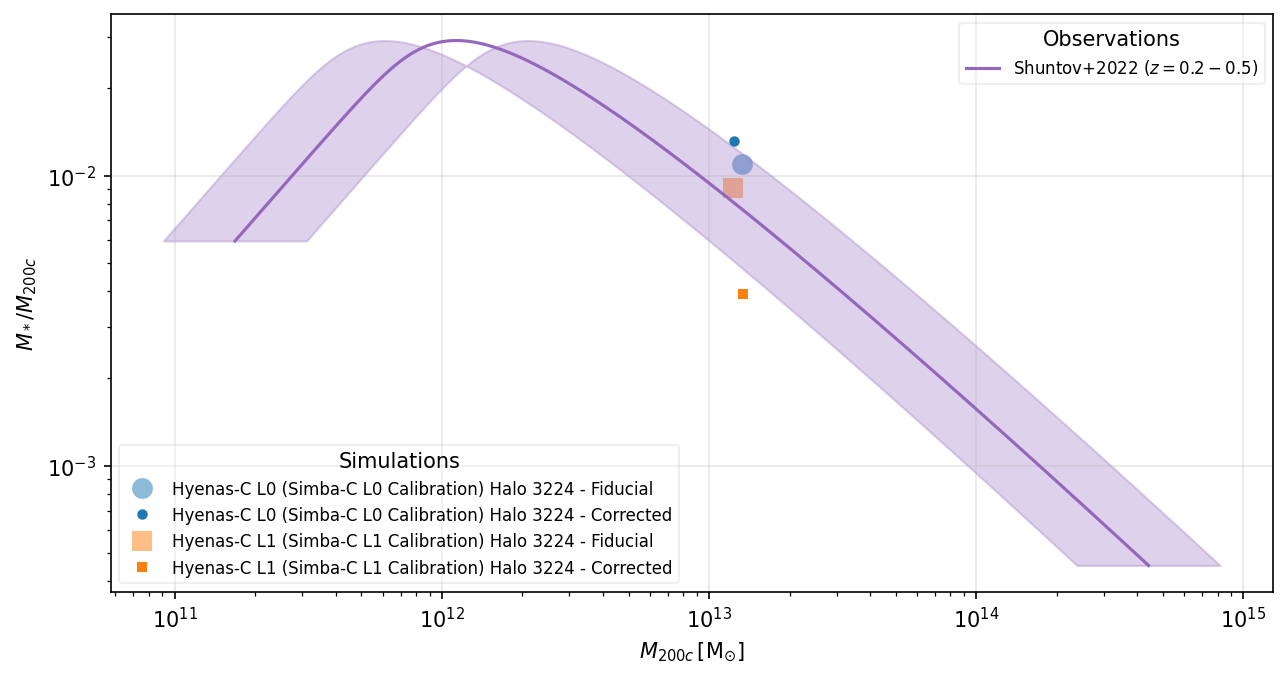

In [71]:
x_prop = ['halo', 'm200c']
y_prop = ['central', 'stellar_mass']

x_label = r'$M_{200c}\,[\mathrm{M_{\odot}}]$'
y_label = r'$M_*/M_{200c}$'

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

sim_plotting = {
    'marker':['o', 'o', 's', 's'],
    'mfc':['C0', 'C0', 'C1', 'C1'],
    'mec':['none']*10,
    'ms':[10, 5, 10, 5],
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['']*10,
    # 'lw':[2, 0.75],
    'alpha':[0.5, 1, 0.5, 1],
    'zorder':[1, 2, 1, 2],
}

# Simulation plotting loop
handles_sim = []
seen_sim = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    try:
        x_ds = sim_info['halo_props'][x_prop[0]][x_prop[1]]
        x = x_ds[:][-1]
        x_units = x_ds.attrs['units']
        print(x_units)
    except Exception:
        # property missing -> skip
        print(f'Missing {x_prop}')
        continue
    
    try:
        y_ds = sim_info['halo_props'][y_prop[0]][y_prop[1]]
        y = y_ds[:][-1]/x_ds[:][-1]
        y_units = y_ds.attrs['units']
        print(y_units)
    except Exception:
        # property missing -> skip
        print(f'Missing {y_prop}')
        continue


    sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
    ax.plot(x, y, **sim_plotting_curr)


    # build legend handles (only once per category)
    if sim not in seen_sim:
        handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
        seen_sim.add(sim)



# Observation Plotting
Mstar = np.linspace(1e9, 2e11, 1000)

# z=0.2-0.5 from Shunto+2022
Mhalo_shuntov22, Mhalo_lo_shuntov22, Mhalo_hi_shuntov22 = smhmr_func_behroozi10(Mstar, logM1=12.629, Mstar0=10**10.855, beta=0.487, delta=0.935, gamma=1.939, sigma_logM=0.268)

ax.plot(Mhalo_shuntov22, Mstar/Mhalo_shuntov22, color='C4', label=r'Shuntov+2022 ($z=0.2-0.5$)')
ax.fill_betweenx(y=Mstar/Mhalo_shuntov22, x1=Mhalo_lo_shuntov22, x2=Mhalo_hi_shuntov22, color='C4', alpha=0.3)





ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(alpha=0.3)

# place legends: simulations
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)

ax.legend(title='Observations', loc='upper right', fontsize=8, framealpha=0.3)

Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Fiducial
Msun
Msun
Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Corrected
Msun
Msun
Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Fiducial
Msun
Msun
Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Corrected
Msun
Msun


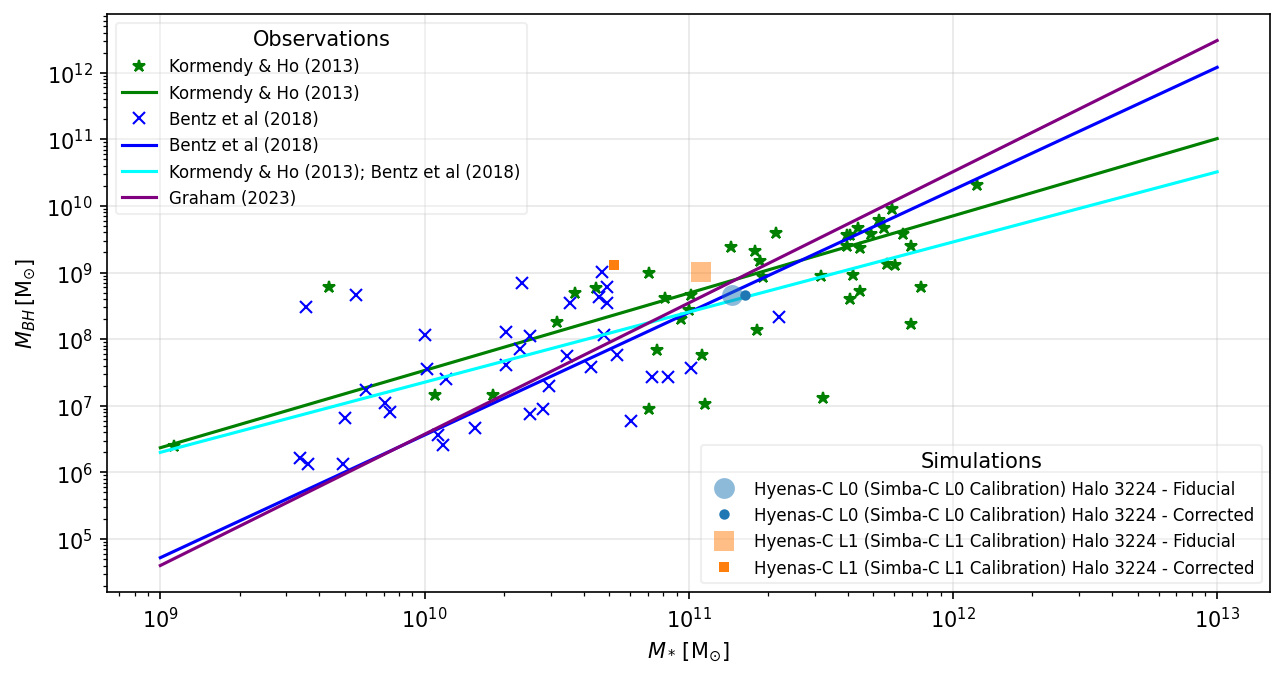

In [75]:
x_prop = ['central', 'stellar_mass']
y_prop = ['central', 'bh_mass']

x_label = r'$M_*\,[\mathrm{M_{\odot}}]$'
y_label = r'$M_{BH}\,[\mathrm{M_{\odot}}]$'

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

sim_plotting = {
    'marker':['o', 'o', 's', 's'],
    'mfc':['C0', 'C0', 'C1', 'C1'],
    'mec':['none']*10,
    'ms':[10, 5, 10, 5],
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['']*10,
    # 'lw':[2, 0.75],
    'alpha':[0.5, 1, 0.5, 1],
    'zorder':[100, 200, 100, 200],
}

# Simulation plotting loop
handles_sim = []
seen_sim = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    try:
        x_ds = sim_info['halo_props'][x_prop[0]][x_prop[1]]
        x = x_ds[:][-1]
        x_units = x_ds.attrs['units']
        print(x_units)
    except Exception:
        # property missing -> skip
        print(f'Missing {x_prop}')
        continue
    
    try:
        y_ds = sim_info['halo_props'][y_prop[0]][y_prop[1]]
        y = y_ds[:][-1]*1e10
        y_units = y_ds.attrs['units']
        print(y_units)
    except Exception:
        # property missing -> skip
        print(f'Missing {y_prop}')
        continue


    sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
    ax.plot(x, y, **sim_plotting_curr)


    # build legend handles (only once per category)
    if sim not in seen_sim:
        handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
        seen_sim.add(sim)




# Plot observational data
observations_ = [
    observational_data['observations']['bhmsm']['KormendyHo2013']['kh13_bhmsm_log_data.hdf5'],
     observational_data['observations']['bhmsm']['KormendyHo2013']['kh13_bhmsm_log_fit_og.hdf5'],
     observational_data['observations']['bhmsm']['Bentz18']['bentz18_bhmsm_log_data.hdf5'],
     observational_data['observations']['bhmsm']['Bentz18']['bentz18_bhmsm_log_fit_og.hdf5'],
     observational_data['observations']['bhmsm']['KH13+Bentz18']['kh13+bentz18_bhmsm_log_fit.hdf5'],
    observational_data['observations']['bhmsm']['Graham23']['graham23_bhmsm_log_fit_og.hdf5']]
colours_ = ['green', 'green', 'blue', 'blue', 'cyan', 'purple']
fmt_ = ['*', '-', 'x', '-', '-', '-']
# fmt_ = ['*', 'x', '-']
# ls_ = [None, '-', None, '-']

for ii in range(len(observations_)):
#     plt.errorbar(observations_[ii].x.value, observations_[ii].y.value, 
#                  xerr=observations_[ii].x_scatter.value, yerr=observations_[ii].y_scatter.value, 
#                  label=observations_[ii].citation,  
#                  color=colours_[ii], fmt=fmt_[ii])
    ax.errorbar(10**observations_[ii].x.value, 10**observations_[ii].y.value, 
                 xerr=None, yerr=None, 
                 label=observations_[ii].citation,  
                 color=colours_[ii], fmt=fmt_[ii])





ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(alpha=0.3)

# place legends: simulations
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='lower right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)

ax.legend(title='Observations', loc='upper left', fontsize=8, framealpha=0.3)

In [25]:
def sfms_func_popesso2025(Mstar, t, a0, a1, a2, a3, a4):
    ## Equation 15
    log_SFR_max = a0 + a1*t
    log_M0 = a2 + a3*t
    log_SFR = log_SFR_max - np.log10(1 + (Mstar/10**log_M0)**(-a4))
    SFR = 10**log_SFR
    return SFR

Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Fiducial
Msun
Msun/yr
Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Corrected
Msun
Msun/yr
Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Fiducial
Msun
Msun/yr
Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Corrected
Msun
Msun/yr


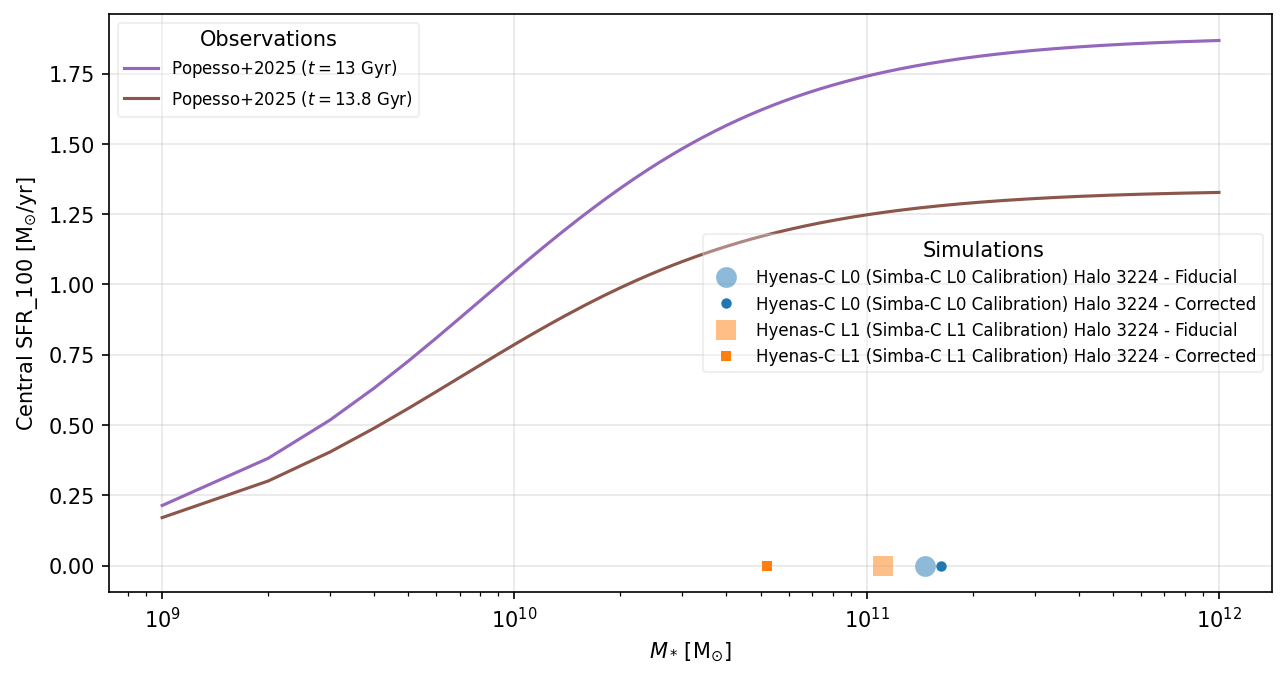

In [69]:
x_prop = ['central', 'stellar_mass']
y_prop = ['central', 'sfr_100']

x_label = r'$M_*\,[\mathrm{M_{\odot}}]$'
y_label = r'Central SFR_100 $[\mathrm{M_{\odot}/yr}]$'

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

sim_plotting = {
    'marker':['o', 'o', 's', 's'],
    'mfc':['C0', 'C0', 'C1', 'C1'],
    'mec':['none']*10,
    'ms':[10, 5, 10, 5],
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['']*10,
    # 'lw':[2, 0.75],
    'alpha':[0.5, 1, 0.5, 1],
    'zorder':[1, 2, 1, 2],
}

# Simulation plotting loop
handles_sim = []
seen_sim = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    try:
        x_ds = sim_info['halo_props'][x_prop[0]][x_prop[1]]
        x = x_ds[:][-1]
        x_units = x_ds.attrs['units']
        print(x_units)
    except Exception:
        # property missing -> skip
        print(f'Missing {x_prop}')
        continue
    
    try:
        y_ds = sim_info['halo_props'][y_prop[0]][y_prop[1]]
        y = y_ds[:][-1]
        y_units = y_ds.attrs['units']
        print(y_units)
    except Exception:
        # property missing -> skip
        print(f'Missing {y_prop}')
        continue


    sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
    ax.plot(x, y, **sim_plotting_curr)


    # build legend handles (only once per category)
    if sim not in seen_sim:
        handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
        seen_sim.add(sim)



# Observation Plotting
Mstar = np.linspace(1e9, 1e12, 1000)

# z=0.2-0.5 from Shunto+2022
SFR_popesso25 = sfms_func_popesso2025(Mstar, t=13, a0=2.693, a1=-0.186, a2=10.85, a3=-0.0729, a4=0.99)
ax.plot(Mstar, SFR_popesso25, color='C4', label=r'Popesso+2025 ($t=13$ Gyr)')

SFR_popesso25 = sfms_func_popesso2025(Mstar, t=13.8, a0=2.693, a1=-0.186, a2=10.85, a3=-0.0729, a4=0.99)
ax.plot(Mstar, SFR_popesso25, color='C5', label=r'Popesso+2025 ($t=13.8$ Gyr)')
# ax.fill_betweenx(y=Mstar, x1=Mhalo_lo_shuntov22, x2=Mhalo_hi_shuntov22, color='C4', alpha=0.3)





ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_xscale('log')
# ax.set_yscale('symlog')
ax.grid(alpha=0.3)

# place legends: simulations
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='center right', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)

ax.legend(title='Observations', loc='upper left', fontsize=8, framealpha=0.3)

Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Fiducial
Msun
Msun/yr
Hyenas-C L0 (Simba-C L0 Calibration) Halo 3224 - Corrected
Msun
Msun/yr
Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Fiducial
Msun
Msun/yr
Hyenas-C L1 (Simba-C L1 Calibration) Halo 3224 - Corrected
Msun
Msun/yr


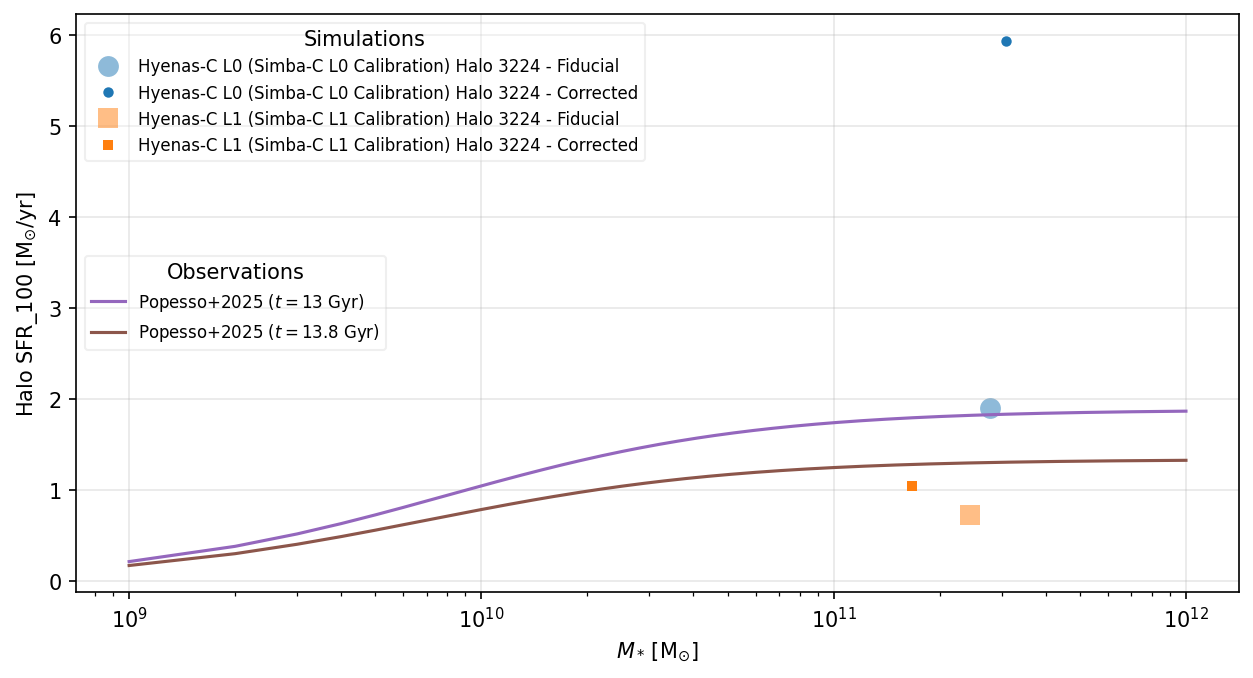

In [43]:
x_prop = ['halo', 'stellar_mass']
y_prop = ['halo', 'sfr_100']

x_label = r'$M_*\,[\mathrm{M_{\odot}}]$'
y_label = r'Halo SFR_100 $[\mathrm{M_{\odot}/yr}]$'

fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(150)

sim_plotting = {
    'marker':['o', 'o', 's', 's'],
    'mfc':['C0', 'C0', 'C1', 'C1'],
    'mec':['none']*10,
    'ms':[10, 5, 10, 5],
    # 'color':['C0', 'C1', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    # 'color':['C0', 'C0', 'C1', 'C1'],
    'ls':['']*10,
    # 'lw':[2, 0.75],
    'alpha':[0.5, 1, 0.5, 1],
    'zorder':[1, 2, 1, 2],
}

# Simulation plotting loop
handles_sim = []
seen_sim = set()

for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    try:
        x_ds = sim_info['halo_props'][x_prop[0]][x_prop[1]]
        x = x_ds[:][-1]
        x_units = x_ds.attrs['units']
        print(x_units)
    except Exception:
        # property missing -> skip
        print(f'Missing {x_prop}')
        continue
    
    try:
        y_ds = sim_info['halo_props'][y_prop[0]][y_prop[1]]
        y = y_ds[:][-1]
        y_units = y_ds.attrs['units']
        print(y_units)
    except Exception:
        # property missing -> skip
        print(f'Missing {y_prop}')
        continue


    sim_plotting_curr = {name:vals[sim_counter] for name, vals in sim_plotting.items()}
    ax.plot(x, y, **sim_plotting_curr)


    # build legend handles (only once per category)
    if sim not in seen_sim:
        handles_sim.append(Line2D([], [], **sim_plotting_curr, label=sim))
        seen_sim.add(sim)



# Observation Plotting
Mstar = np.linspace(1e9, 1e12, 1000)

# z=0.2-0.5 from Shunto+2022
SFR_popesso25 = sfms_func_popesso2025(Mstar, t=13, a0=2.693, a1=-0.186, a2=10.85, a3=-0.0729, a4=0.99)
ax.plot(Mstar, SFR_popesso25, color='C4', label=r'Popesso+2025 ($t=13$ Gyr)')

SFR_popesso25 = sfms_func_popesso2025(Mstar, t=13.8, a0=2.693, a1=-0.186, a2=10.85, a3=-0.0729, a4=0.99)
ax.plot(Mstar, SFR_popesso25, color='C5', label=r'Popesso+2025 ($t=13.8$ Gyr)')
# ax.fill_betweenx(y=Mstar, x1=Mhalo_lo_shuntov22, x2=Mhalo_hi_shuntov22, color='C4', alpha=0.3)





ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_xscale('log')
# ax.set_yscale('symlog')
ax.grid(alpha=0.3)

# place legends: simulations
leg_sim = ax.legend(handles=handles_sim, title='Simulations', loc='upper left', fontsize=8, framealpha=0.3)
ax.add_artist(leg_sim)

ax.legend(title='Observations', loc='center left', fontsize=8, framealpha=0.3)

### Compare all Hyenas halos, L0 vs L1

In [ ]:
# create code/function to get all halo ids that are read in, both L0 and L1
# Loop over ids, using try-except to plot L0 Mbh-Mstar or Mbh-Mhalo, and then same for L1
# If both are successfully plotted, draw arrow pointing from L0 point to L1 point

## Mbh, BH fedd, Mgas, Mstar over cosmic time

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
sim_colors = ['C0', 'C1', 'C4', 'C6']

props_to_plot = [
    'bh_mass', 'bh_30kpc_mass', 'bh_fedd',
    'nPartType5_30ckpc', #'nPartType5_50ckpc',
    # 'gas_mass', 
    'gas_30kpc_mass',
    # 'stellar_mass', 
    'star_30kpc_mass', #'stellar_30kpc_mass',
]

prop_labels = [
    r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$',
    r'$M_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$',
    r'$f_{\mathrm{Edd}}$',
    r'$N_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})$',
    # r'$N_{\mathrm{BH}}(\leq\mathrm{50\,ckpc})$',
    # r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$',
    r'$M_{\mathrm{gas}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$',
    # r'$M_{\mathrm{*}}/\mathrm{M_\odot}$',
    r'$M_{\mathrm{*}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$',
    # r'$M_{\mathrm{*}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$',
]


# obj_types = ['first_mmp_halo', 'first_mmp_central_halo']
# obj_types = ['first_mmp_halo', 'second_mmp_halo']
# obj_types = ['first_mmp_central_halo', 'second_mmp_central_halo']
obj_types = ['first_mmp_central', 'first_mmp_halo_central']
# obj_types = ['first_mmp_central', 'second_mmp_central']
# obj_types = ['first_mmp_halo_central', 'second_mmp_halo_central']
obj_names = [
    # r'1st MMP of $z=0$ Halo', r'Halo of 1st MMP of $z=0$ Central Galaxy',
    # r'1st MMP of $z=0$ Halo', r'2nd MMP of $z=0$ Halo',
    # r'Halo of 1st MMP of $z=0$ Central Galaxy', r'Halo of 2nd MMP of $z=0$ Central Galaxy',
    r'1st MMP of $z=0$ Central Galaxy', r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'1st MMP of $z=0$ Central Galaxy', r'2nd MMP of $z=0$ Central Galaxy',
    # r'Central Galaxy of 1st MMP of $z=0$ Halo', r'Central Galaxy of 2nd MMP of $z=0$ Halo',
]
# obj_sizes = [4, 2]
obj_sizes = [2, 4]
# obj_alphas = [1, 0.5]
obj_alphas = [0.5, 1]


nrows = len(props_to_plot)
ncols = len(list(sim_dict.keys()))

fig, axes = plt.subplots(num=1, figsize=(8,12),
                       nrows=nrows, ncols=ncols,
                       sharex='col', sharey='row', layout='constrained')
fig.set_dpi(200)
# fig.set_xscale('log')
fig.suptitle('Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224')
fig.supxlabel('Universe Age [Gyr]')

handles = [Line2D([],[],marker='o',mfc='none',ls='',mec='black',mew=0.5,ms=ms,alpha=alpha) for ms, alpha in zip(obj_sizes, obj_alphas)]
leg = Legend(fig, handles=handles, labels=obj_names, fontsize=8, loc=(0, 0))
fig.add_artist(leg)


title_type = 'manual'
titles = [
    # r'$M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$',
    # r'$M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$',
    'Ref',
    'Smag',
    'Grad',
]

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    if title_type == 'sim':
        axes[0,sim_counter].set_title(sim, fontsize=10, wrap=True)
    elif title_type == 'manual':
        axes[0,sim_counter].set_title(titles[sim_counter], fontsize=10, wrap=True)

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]
    halo_props = sim_info['halo_props']

    for prop_counter, prop in enumerate(props_to_plot):
        ax = axes[prop_counter, sim_counter]
        if sim_counter == 0:
            ax.set_ylabel(prop_labels[prop_counter], fontsize=10)
            
        ax.set_xscale('log')
        ax.set_yscale('log')

        if prop == 'bh_mass':
            # ax.fill_betweenx(y=[4e7,6e7], x1=0.5, x2=20, color='C0', alpha=0.3, hatch='//',
            #                  label='Jets Activating (Simba)')
            ax.fill_betweenx(y=[7e7,1e8], x1=0.3, x2=20, color='green', alpha=0.3, hatch='//',
                             label='Jets Activating (Simba-C)')
            ax.legend(fontsize=6)

        if prop == 'bh_fedd':
            ax.fill_betweenx(y=[2e-2,2e-1], x1=0.3, x2=20, color='green', alpha=0.3, hatch='//',
                     label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')
            ax.legend(fontsize=6)

        for obj_counter, obj_type in enumerate(obj_types):

            size = obj_sizes[obj_counter]
            alpha = obj_alphas[obj_counter]

            x = halo_props[obj_type]['age'][:]
            # x1 = halo_props['first_mmp_central']['age'][:]
            # x2 = halo_props['first_mmp_halo_central']['age'][:]

            try:
                y = halo_props[obj_type][prop]
                print(f'y units: {y.attrs['units']}')
            except Exception as error:
                print(f'Error with {obj_type}: {error}')
                continue
                # do1 = False
    
            # do1 = True
            # try:
            #     y1 = halo_props['first_mmp_central'][prop]
            #     print(f'y1 units: {y1.attrs['units']}')
            # except:
            #     do1 = False
    
            # do2 = True
            # try:
            #     y2 = halo_props['first_mmp_halo_central'][prop]
            #     print(f'y2 units: {y2.attrs['units']}\n')
            # except:
            #     do2 = False
    
            # if sim_counter == 0:
            #     label = r"$z=0$ Central's First MMP"
            #     # label = r"Central of $z=0$ Halo's First MMP"
            # else:
            #     label = None

            ax.plot(x[:], y[:], 
                    marker=marker, mfc='none', mec=color,
                    mew=0.5, ms=size, alpha=alpha, ls='')
    
            # if do1:
            #     ax.plot(x1[:], y1[:], 
            #             marker=marker, mfc='none', mec=color,
            #             mew=0.5, ms=4, alpha=1, ls='')
    
            # if do2:
            #     ax.plot(x2[:], y2[:], 
            #             marker=marker, mfc='none', mec=color,
            #             mew=0.5, ms=2, alpha=0.5, ls='')
        
            # curr_handle= Line2D([], [], color=color, ls='',
            #                     marker=marker, ms=5, mec='black',
            #                     mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
            # handle_list.append(curr_handle)
            # labels_list.append(sim)
    
    
            ## Plot all 0 values as 1 dex below minimum nonzero value
            zero_value_indexes = np.where(np.array(y[:])==0)[0]
            nonzero_value_indexes = np.where(np.array(y[:])!=0)[0]
            # print(zero_value_indexes)
            try:
                # print(min(np.log10(np.array(y[:])[nonzero_value_indexes])))
                zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y[:])[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
            except:
                zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
            # print(zero_value_for_plotting)
    
            ax.plot(np.array(x[:])[zero_value_indexes], zero_value_for_plotting, 
                    marker=marker, mfc='none', ms=size, alpha=alpha,
                    mec='black', mew=0.5, ls='')
            
            # if do1:
            #     zero_value_indexes = np.where(np.array(y1[:])==0)[0]
            #     nonzero_value_indexes = np.where(np.array(y1[:])!=0)[0]
            #     # print(zero_value_indexes)
            #     try:
            #         # print(min(np.log10(np.array(y[:])[nonzero_value_indexes])))
            #         zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y1[:])[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
            #     except:
            #         zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
            #     # print(zero_value_for_plotting)
        
            #     ax.plot(np.array(x1[:])[zero_value_indexes], zero_value_for_plotting, 
            #             marker=marker, mfc='none', ms=4, alpha=1,
            #             mec='black', mew=0.5, ls='')
    
    
            # if do2:
            #     zero_value_indexes = np.where(np.array(y2[:])==0)[0]
            #     nonzero_value_indexes = np.where(np.array(y2[:])!=0)[0]
            #     # print(zero_value_indexes)
            #     try:
            #         # print(min(np.log10(np.array(y[:])[nonzero_value_indexes])))
            #         zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y2[:])[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
            #     except:
            #         zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
            #     # print(zero_value_for_plotting)
        
            #     ax.plot(np.array(x2[:])[zero_value_indexes], zero_value_for_plotting, 
            #             marker=marker, mfc='none', ms=2, alpha=0.5,
            #             mec='black', mew=0.5, ls='')

    print()

## BH fedd vs Mbh

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']

    central_fedd_to_plot = copy.deepcopy(halo_props['central']['bh_fedd'][:])
    # central_fedd_to_plot[central_fedd_to_plot==0] = 1e-10

    halo_central_fedd_to_plot = copy.deepcopy(halo_props['halo_central']['bh_fedd'][:])
    # halo_central_fedd_to_plot[halo_central_fedd_to_plot==0] = 1e-10

    if sim_counter == 0:
        label_central = r'$z=0$ Central Progenitor'
        label_halo_central = r'Central of $z=0$ Halo Progenitor'
    else:
        label_central = None
        label_halo_central = None
    
    # ax.plot(halo_props['central']['bh_mass'][:], central_fedd_to_plot,
    #         marker=marker, ms=3, mew=0.25, mec='black',
    #         color=color, mfc=color, ls='-', lw=1, alpha=1,
    #         label=label_central)

    ax.plot(halo_props['halo_central']['bh_mass'][:], halo_central_fedd_to_plot,
            marker=marker, ms=3, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=1,
            label=label_halo_central)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=3, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[0,2e-1], x1=7e7, x2=1e8, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')
ax.fill_betweenx(y=[0,2e-1], x1=4e7, x2=6e7, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba)')

ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$f_{\mathrm{Edd}}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(7e-11,1e1)
ax.set_xlim(1e3, 2e9)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

In [ ]:
# sim_markers = ['o', '+', '^', 'x']
sim_markers = ['o', 'P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']

    central_fedd_to_plot = copy.deepcopy(halo_props['central']['bh_fedd'][:])
    # central_fedd_to_plot[central_fedd_to_plot==0] = 1e-10

    halo_central_fedd_to_plot = copy.deepcopy(halo_props['halo_central']['bh_fedd'][:])
    # halo_central_fedd_to_plot[halo_central_fedd_to_plot==0] = 1e-10

    if sim_counter == 0:
        label_central = r'$z=0$ Central Progenitor'
        label_halo_central = r'Central of $z=0$ Halo Progenitor'
    else:
        label_central = None
        label_halo_central = None
    
    ax.plot(halo_props['central']['bh_mass'][:], central_fedd_to_plot,
            marker=marker, ms=3, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=1,
            label=label_central)

    # ax.plot(halo_props['halo_central']['bh_mass'][:], halo_central_fedd_to_plot,
    #         marker=marker, ms=3, mew=0.25, mec='black',
    #         color=color, mfc=color, ls='-', lw=1, alpha=1,
    #         label=label_halo_central)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=3, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[0,2e-1], x1=7e7, x2=1e8, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')
ax.fill_betweenx(y=[0,2e-1], x1=4e7, x2=6e7, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba)')

ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$f_{\mathrm{Edd}}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(7e-11,1e1)
ax.set_xlim(4e7, 2e9)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

## Mgas vs Mbh

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']

    x = halo_props['central']['bh_mass']
    y = halo_props['central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=3, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=3, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3, 2e9)
ax.set_ylim(1e6,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']

    x = halo_props['halo_central']['bh_mass']
    y = halo_props['halo_central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=3, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=3, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3, 2e9)
ax.set_ylim(1e6,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_mass']
    y = halo_props['central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_mass']
    y = halo_props['halo_central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3, 2e9)
ax.set_ylim(1e6,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_mass']
    y = halo_props['central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_mass']
    y = halo_props['halo_central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3, 2e9)
ax.set_ylim(1e8,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_30kpc_mass']
    y = halo_props['central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_30kpc_mass']
    y = halo_props['halo_central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e6,1e11], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e6,1e11], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(5e3, 2e10)
ax.set_ylim(1e8,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_30kpc_mass']
    y = halo_props['central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_30kpc_mass']
    y = halo_props['halo_central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e6,1e11], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e6,1e11], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(5e3, 2e10)
ax.set_ylim(1e7,2e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

## Mstar vs Mbh

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_mass']
    y = halo_props['central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_mass']
    y = halo_props['halo_central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{*}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3, 2e9)
ax.set_ylim(5e6,1e12)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_mass']
    y = halo_props['central']['stellar_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_mass']
    y = halo_props['halo_central']['stellar_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{*}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3,2e9)
ax.set_ylim(5e6,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_30kpc_mass']
    y = halo_props['central']['stellar_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_30kpc_mass']
    y = halo_props['halo_central']['stellar_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e6,1e11], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e6,1e11], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{*}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(5e3, 2e10)
ax.set_ylim(5e6,1e12)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_30kpc_mass']
    y = halo_props['central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_30kpc_mass']
    y = halo_props['halo_central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e6,1e11], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e6,1e11], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{*}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(5e3, 2e10)
ax.set_ylim(5e6,1e12)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

## Mgas vs fedd

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_fedd']
    y = halo_props['central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    # ax.plot(x[:], y[:],
    #         marker=marker, ms=5, mew=0.25, mec='black',
    #         color=color, mfc=color, ls='-', lw=1, alpha=1,
    #         label=label)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_fedd']
    y = halo_props['halo_central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=0.5,
            label=label)


ax.fill_betweenx(y=[1e0,1e15], x1=2e-1, x2=1e2, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

ax.fill_betweenx(y=[1e0,1e15], x1=2e-2, x2=2e-1, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=0, x2=2e-2, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$f_{\mathrm{Edd}}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-5, 4e0)
ax.set_ylim(1e7,5e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_fedd']
    y = halo_props['central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    # ax.plot(x[:], y[:],
    #         marker=marker, ms=5, mew=0.25, mec='black',
    #         color=color, mfc=color, ls='', lw=1, alpha=1,
    #         label=label)


    x = halo_props['halo_central']['bh_fedd']
    y = halo_props['halo_central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=0.5,
            label=label)



    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


ax.fill_betweenx(y=[1e0,1e15], x1=2e-1, x2=1e2, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

ax.fill_betweenx(y=[1e0,1e15], x1=2e-2, x2=2e-1, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=0, x2=2e-2, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$f_{\mathrm{Edd}}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-5, 4e0)
ax.set_ylim(1e7,5e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

## Mstar vs fedd

In [ ]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_fedd']
    y = halo_props['central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_fedd']
    y = halo_props['halo_central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    # ax.plot(x[:], y[:],
    #         marker=marker, ms=2.5, mew=0.25, mec='black',
    #         color=color, mfc=color, ls='-', lw=1, alpha=0.5,
    #         label=label)


ax.fill_betweenx(y=[1e0,1e15], x1=2e-1, x2=1e2, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

ax.fill_betweenx(y=[1e0,1e15], x1=2e-2, x2=2e-1, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=0, x2=2e-2, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$f_{\mathrm{Edd}}$')
ax.set_ylabel(r'$M_{\mathrm{*}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-5, 4e0)
ax.set_ylim(5e7,1e12)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()